In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
print(df.shape)
df.head()

<AxesSubplot: xlabel='cgpa', ylabel='resume_score'>

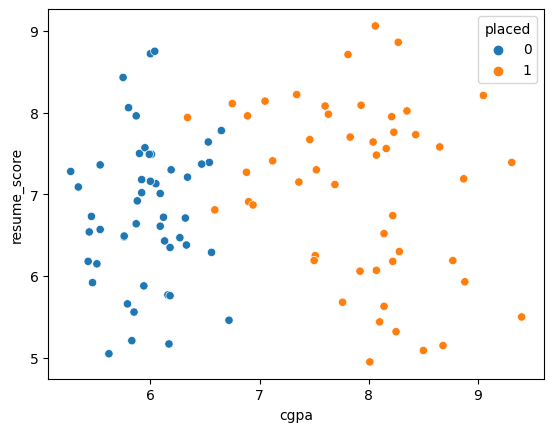

In [5]:
sns.scatterplot(data=df, x="cgpa", y="resume_score", hue="placed")

In [6]:
#Target and Independent features:

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

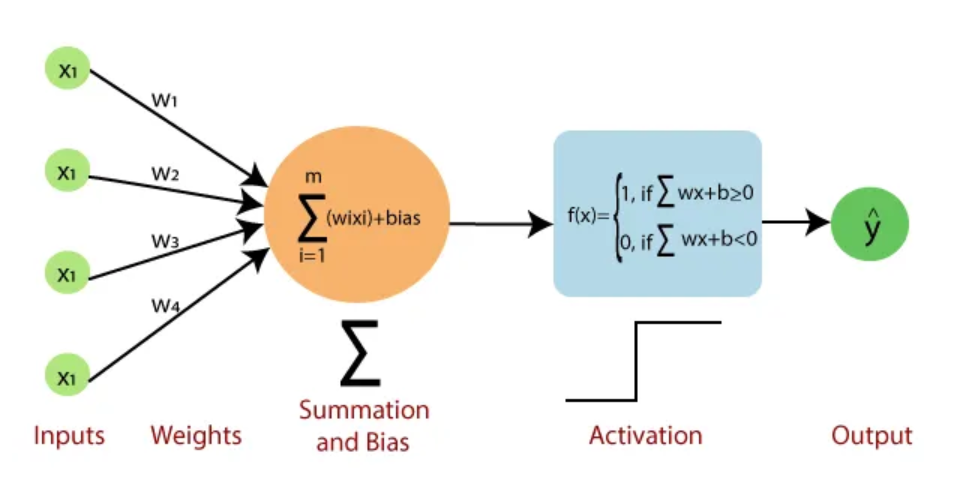

In [8]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X,y)
p.coef_

array([[ 40.26, -36.  ]])

In [9]:
p.intercept_

array([-25.])

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot: >

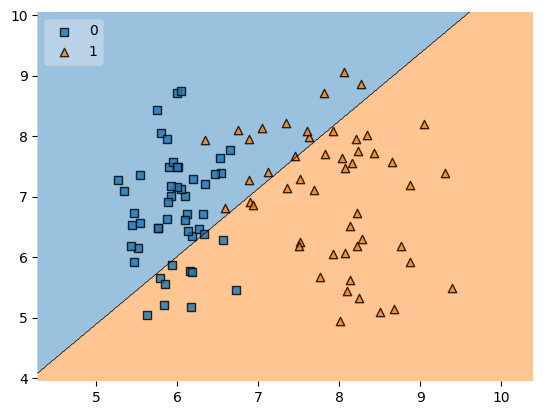

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p, legend=2)

### Perceptron Trick

In [11]:
#https://www.desmos.com/calculator

In [12]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

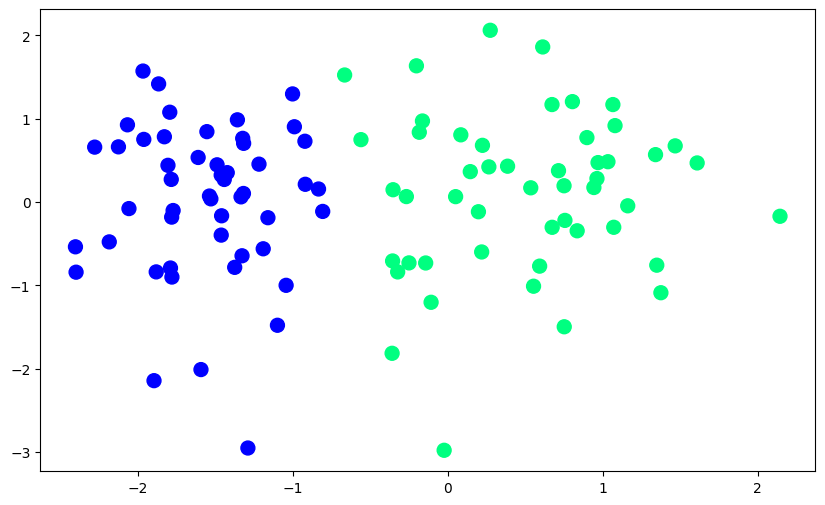

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [14]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [15]:
def step(z):
    return 1 if z>0 else 0

In [16]:
intercept_,coef_ = perceptron(X,y)

In [17]:
print(coef_)
print(intercept_)

[1.38497892 0.11928272]
1.0


In [18]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [19]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

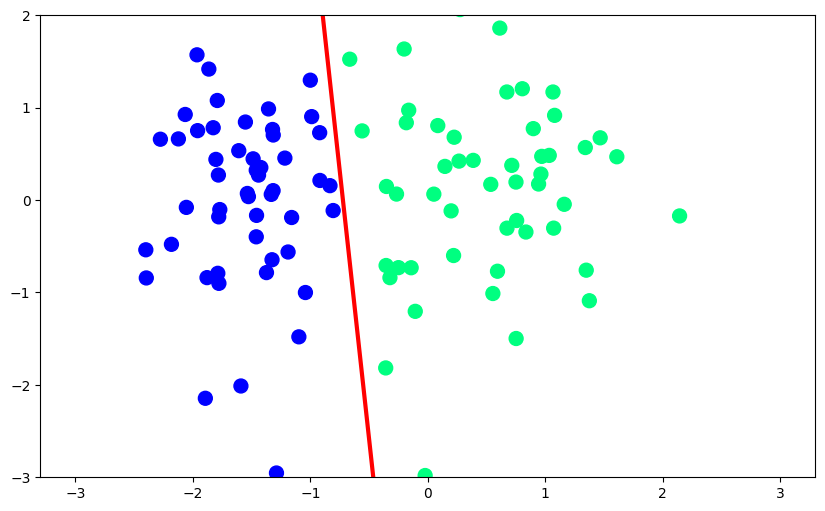

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [21]:
#Perceptron Loss Function

In [22]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [23]:
X.shape

(100, 2)

In [24]:
y.shape

(100,)

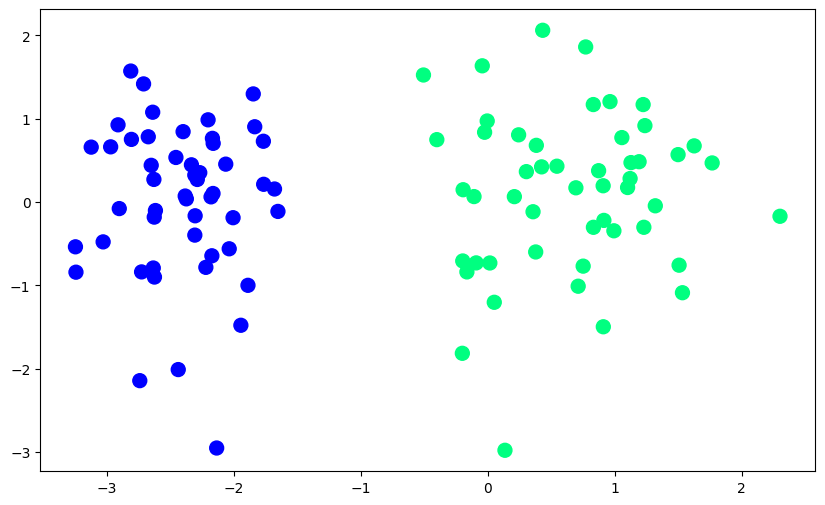

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [26]:
def perceptron(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
    
        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b

In [27]:
w1,w2,b = perceptron(X,y)

In [28]:
b

1.3000000000000003

In [29]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

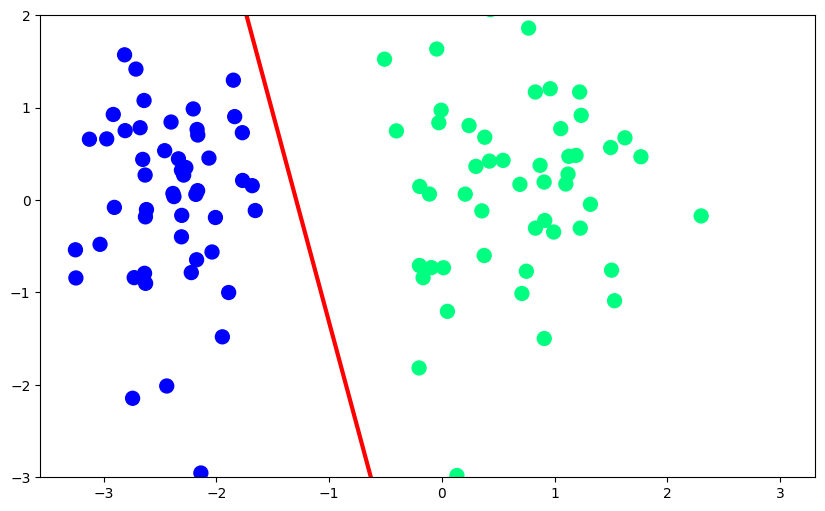

In [30]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [31]:
#loss function
#https://scikit-learn.org/stable/modules/sgd.html

In [32]:
#Problem-with-perceptron

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]

and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]

xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [35]:
and_data

,input1,input2,ouput
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<AxesSubplot: xlabel='input1', ylabel='input2'>

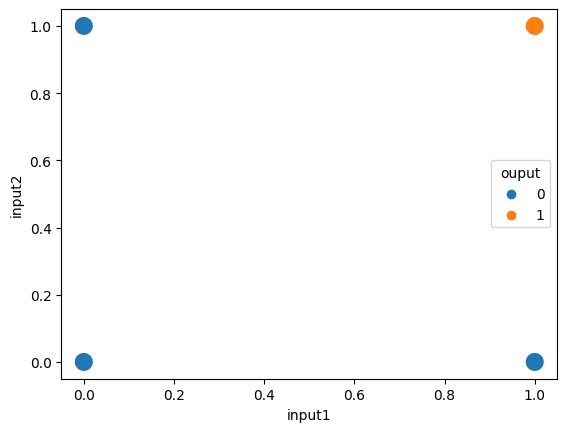

In [36]:
sns.scatterplot(data=and_data, x="input1", y="input2", hue="ouput",s=200)

In [37]:
or_data

,input1,input2,ouput
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<AxesSubplot: xlabel='input1', ylabel='input2'>

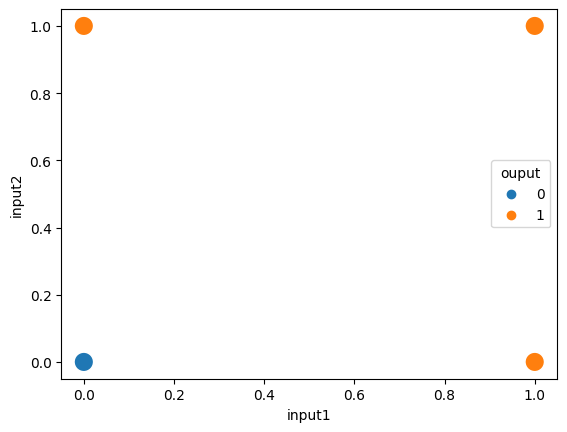

In [38]:
sns.scatterplot(data=or_data, x="input1", y="input2", hue="ouput",s=200)

In [39]:
xor_data

,input1,input2,ouput
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


<AxesSubplot: xlabel='input1', ylabel='input2'>

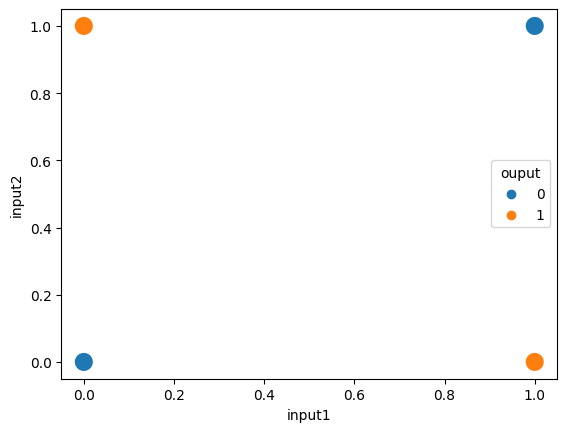

In [40]:
sns.scatterplot(data=xor_data, x="input1", y="input2", hue="ouput",s=200)

In [41]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [42]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [43]:
clf1.coef_

array([[2., 2.]])

In [44]:
clf1.intercept_

array([-2.])

In [45]:
x=np.linspace(-1,1,5)
y=-x+1

<AxesSubplot: xlabel='input1', ylabel='input2'>

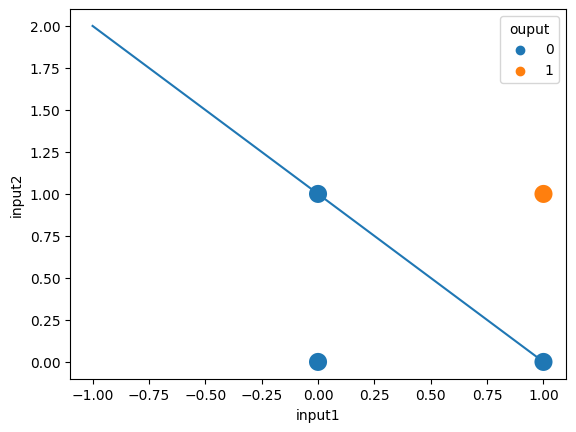

In [46]:
plt.plot(x,y)
sns.scatterplot(data=and_data, x="input1", y="input2", hue="ouput",s=200)

In [47]:
clf2.coef_

array([[2., 2.]])

In [48]:
clf2.intercept_

array([-1.])

In [49]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

<AxesSubplot: xlabel='input1', ylabel='input2'>

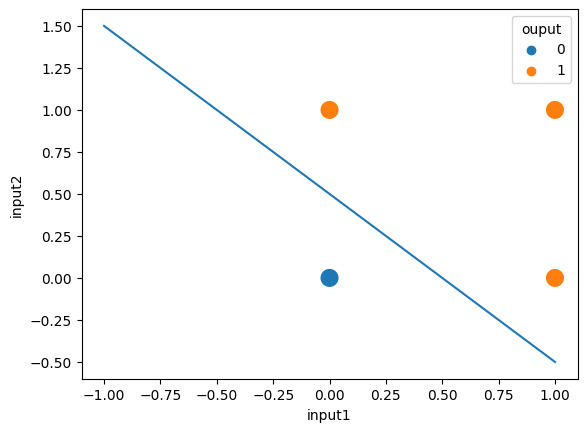

In [50]:
plt.plot(x1,y1)
sns.scatterplot(data=or_data, x="input1", y="input2", hue="ouput",s=200)

In [51]:
clf3.coef_

array([[0., 0.]])

In [52]:
clf3.intercept_

array([0.])

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

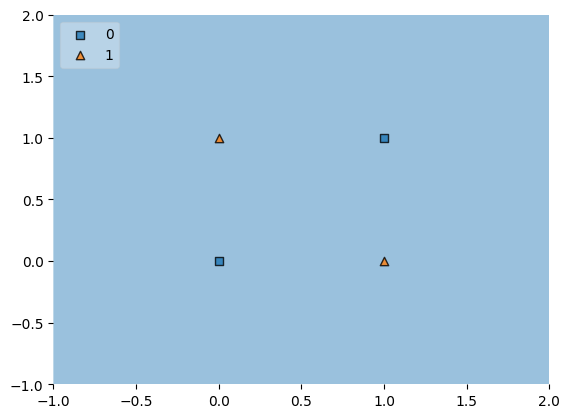

In [53]:
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values, clf=clf3, legend=2)

## MLP

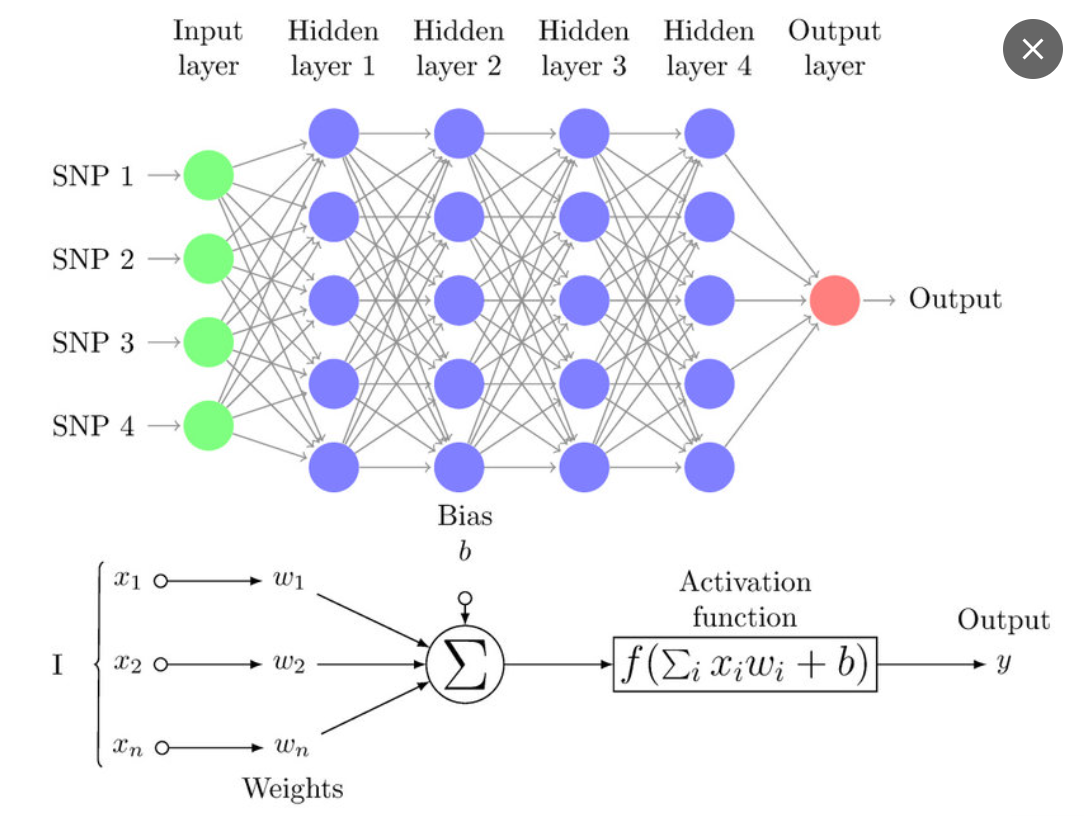

In [58]:
#https://playground.tensorflow.org/

In [59]:
#Customer Churn Prediction using ANN
#https://www.kaggle.com/code/campusx/notebook8ad570467f/notebook

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [61]:
df = pd.read_csv('Churn_Modelling.csv')
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [63]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [64]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [65]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [66]:
df.shape

(10000, 12)

In [67]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [70]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

### Activation functions
### Activation functions play a crucial role in deep learning by introducing non-linearity to the network, allowing it to learn complex relationships and patterns in data. 

### Non-linearity: Introduce non-linearities for capturing complex data patterns.
### Hierarchy: Enable learning intricate hierarchical representations.
### Gradient Flow: Facilitate stable gradients for efficient backpropagation.
### Symmetry Break: Prevent neurons from learning same features.
### Sparsity: ReLU promotes sparse activations, aiding efficiency.
### Handling Negatives: Handle negative inputs effectively.
### Adaptivity: Some adapt to data distribution, improving generalization.
### Squashing: Transform inputs into specific output ranges.
### Crucial Component: Integral for deep network's expressive power and performance.

### Optimizers
### Optimizers are essential in deep learning for efficient training of neural networks by adjusting model parameters during the learning process.

### Gradient Descent: Adjust model weights by minimizing loss function through gradient updates.
### Faster Convergence: Control learning rate and updates for quicker convergence to optimal solutions.
### Escape Local Minima: Techniques like momentum aid escaping suboptimal solutions.
### Adaptive Learning: Dynamically adjust learning rates per parameter for efficient learning.
### Regularization: Incorporate regularization to prevent overfitting.
### Noise Handling: Adapt to noisy gradients and sparse data, improving stability.
### Batch Support: Accommodate different batch sizes for efficient training.
### Parallelism: Support parallel processing for faster optimization.
### Advanced Types: Adaptive optimizers like Adam, RMSProp enhance convergence.
### Versatility: Fit various architectures, loss functions, optimizing network performance.

### In summary, optimizers fine-tune neural network parameters, enabling faster convergence, aiding escape from local minima, adapting learning rates, and enhancing training efficiency and stability. Proper choice of optimizer is crucial for effective training and model performance.

### Loss functions
### Loss functions serve a crucial role in deep learning by quantifying the difference between predicted values and actual target values. They guide the training process of neural networks and facilitate model improvement in various ways:


### Error Measurement: Quantifying the difference between predicted and actual values, providing a numerical measure of performance.

### Gradient Computation: Enabling calculation of gradients, guiding parameter updates for error reduction during training.

### Optimization: Serving as the basis for optimization algorithms that iteratively adjust model parameters to minimize the loss.

### Training Guidance: Providing a signal for model improvement by minimizing loss values through iterative training.

### Model Comparison: Facilitating model evaluation by comparing performance based on loss values.

### Task Alignment: Adapting loss functions to specific tasks, like classification, regression, or custom objectives.

### Regularization: Incorporating regularization terms to prevent overfitting and enhance generalization.

### Uncertainty Estimation: Offering insights into prediction uncertainty in certain probabilistic models.

### Multi-objective Handling: Addressing multiple objectives simultaneously through customized loss functions.

### Customization: Designing or modifying loss functions to align with specific needs or expertise.

### In summary, loss functions play a pivotal role in optimizing neural networks, aiding gradient calculation, guiding parameter updates, and ensuring models align with the desired performance for various tasks.








In [72]:
#MLPs
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 7)                 84        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 3ms/step - loss: 2023.0607 - accuracy: 0.7098 - val_loss: 719.2003 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 263.4428 - accuracy: 0.7937 - val_loss: 28.3060 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 5.2579 - accuracy: 0.7956 - val_loss: 0.6395 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.7958 - val_loss: 0.5758 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7958 - val_loss: 0.5582 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7958 - val_loss: 0.5448 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7958 - val_loss: 0.5346 - val_accuracy

Epoch 58/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7958 - val_loss: 0.5046 - val_accuracy: 0.7969
Epoch 59/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7958 - val_loss: 0.5046 - val_accuracy: 0.7969
Epoch 60/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5046 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5046 - val_accuracy: 0.7969
Epoch 62/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7958 - val_loss: 0.5046 - val_accuracy: 0.7969
Epoch 63/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7958 - val_loss: 0.5046 - val_accuracy: 0.7969
Epoch 64/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5046 - val_accuracy:

In [75]:
#Layer 0 Weights and Bias
model.layers[0].get_weights()

[array([[ 3.9952034e-01,  4.4100118e-01,  4.1946000e-01,  8.8640168e-02,
         -3.6168832e-01, -2.2251934e-02,  1.8448743e-01, -5.6020528e-01,
         -5.7620537e-01,  3.5159758e-01, -2.1952344e-01],
        [ 2.2756797e-01,  5.9031492e-01,  1.6443187e-01,  1.4964899e-01,
          1.3518620e-01,  1.0313517e-01,  2.8828356e-01, -5.9650695e-01,
          1.2817189e-01, -3.0118227e-01, -2.5518787e-01],
        [ 1.6270709e-01,  7.4496341e-01,  2.0335211e-01, -3.3102188e-01,
          1.4118341e-01,  3.7278116e-01,  2.3155664e-01,  1.4969186e-04,
          2.2073494e-01, -1.9645765e-01, -4.3604770e-01],
        [ 3.9481822e-02, -1.5618625e-01, -2.6840690e-01, -4.7420284e-01,
          2.6488817e-01, -3.1341144e-01,  2.3736610e-01,  3.2156381e-01,
          5.5861067e-02,  2.3130056e-01,  1.2486623e-01],
        [ 4.4115528e-01,  2.0320877e-01,  4.1133276e-01,  2.2846556e-01,
         -2.6216638e-01, -2.7764112e-02, -6.3950241e-02, -1.6702447e-02,
         -5.8999676e-02,  4.7690248e-0

In [76]:
#Layer 1 Weights and Bias
model.layers[1].get_weights()

[array([[-0.37616432, -0.5755179 ,  0.15979823, -0.47866476,  0.05731914,
         -0.48939535,  0.02711556],
        [-0.4405082 ,  0.2189045 , -0.38198358,  0.16455698,  0.43675187,
          0.46766043, -0.21396036],
        [-0.5243162 , -0.526497  , -0.04875543, -0.46319556,  0.5922081 ,
          0.15893447,  0.5222337 ],
        [ 0.46451426,  0.28342927, -0.54856116, -0.03524005,  0.03268293,
          0.19746768, -0.56491697],
        [-0.5578017 , -0.38936055, -0.11926685,  0.13344438, -0.12228161,
         -0.5033495 ,  0.36200374],
        [-0.51519364, -0.19408739, -0.4179117 , -0.10855973, -0.04080278,
          0.12820858, -0.47704452],
        [-0.18032932,  0.13357009, -0.4551672 , -0.15437125,  0.18293695,
         -0.21816379,  0.17799583],
        [-0.47177234, -0.01720762, -0.07881376,  0.14140482,  0.09216075,
         -0.499963  ,  0.1374116 ],
        [-0.25245088,  0.0785965 , -0.12996775,  0.18622953, -0.4195744 ,
         -0.49526152,  0.31373253],
        [-

In [77]:
#Layer 2 Weights and Bias
model.layers[2].get_weights()

[array([[ 0.30815035],
        [-0.6886814 ],
        [ 0.76563907],
        [-0.78559756],
        [-0.095268  ],
        [ 0.7964625 ],
        [-0.53523034]], dtype=float32),
 array([-1.3590848], dtype=float32)]

In [78]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [79]:
y_pred

array([[0.20438908],
       [0.20438908],
       [0.20438908],
       ...,
       [0.20438908],
       [0.20438908],
       [0.20438908]], dtype=float32)

In [80]:
y_pred = y_pred.argmax(axis=-1)

In [81]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

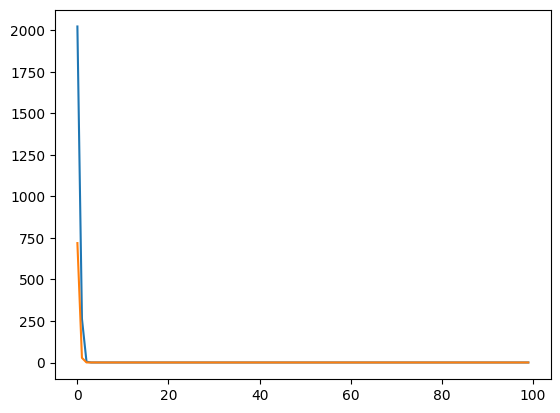

In [83]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

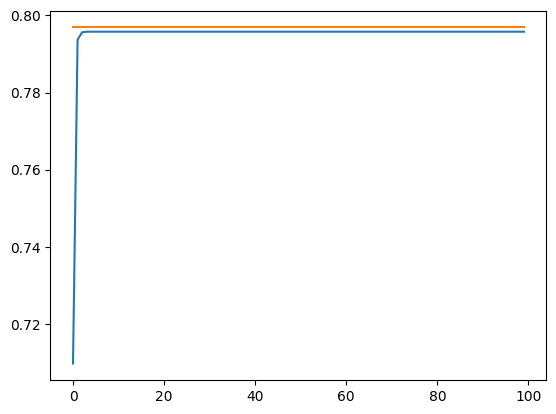

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Image Classification

In [85]:
#mnist-classification

In [86]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [87]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [88]:
X_test.shape

(10000, 28, 28)

In [89]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

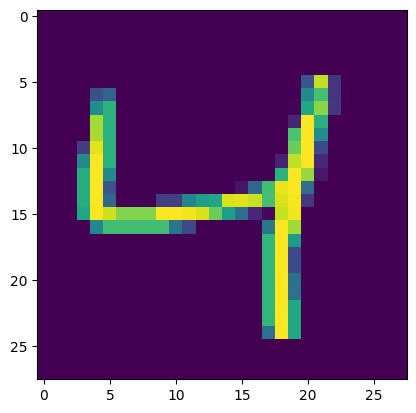

In [90]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [91]:
X_train = X_train/255
X_test = X_test/255

In [92]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [94]:
#MLP
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [96]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2865 - accuracy: 0.9161 - val_loss: 0.1636 - val_accuracy: 0.9499
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1205 - accuracy: 0.9635 - val_loss: 0.1053 - val_accuracy: 0.9658
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0797 - accuracy: 0.9750 - val_loss: 0.1100 - val_accuracy: 0.9645
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0601 - accuracy: 0.9809 - val_loss: 0.1042 - val_accuracy: 0.9688
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.0899 - val_accuracy: 0.9721
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0366 - accuracy: 0.9871 - val_loss: 0.1033 - val_accuracy: 0.9718
Epoch 7/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.1060 - val_accuracy:

In [97]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [98]:
y_pred = y_prob.argmax(axis=1)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777

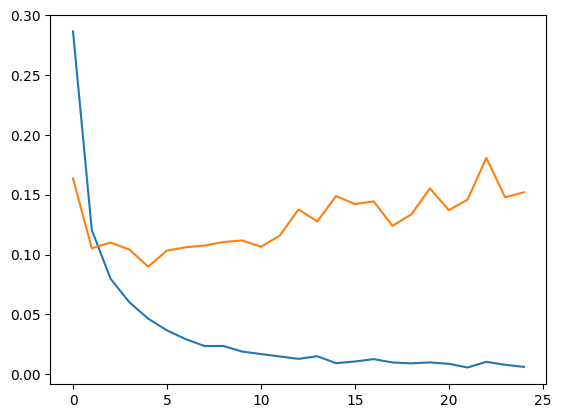

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

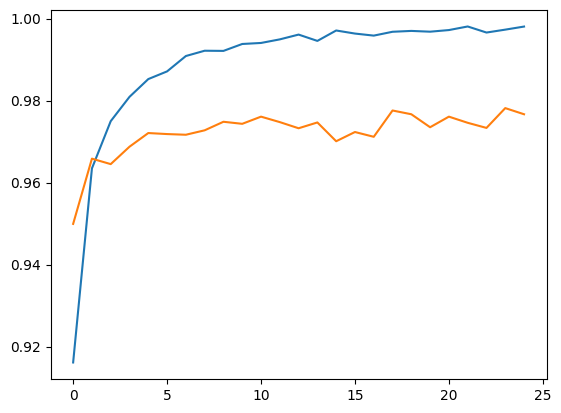

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

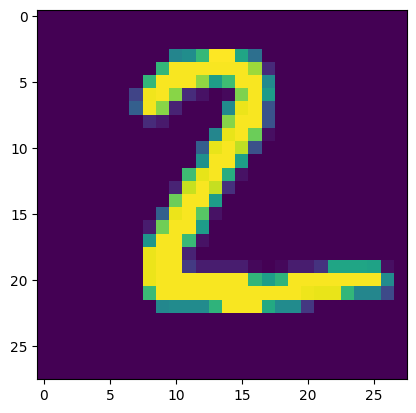

In [102]:
plt.imshow(X_test[1])

In [103]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([2], dtype=int64)

## Regression via MLP

In [104]:
#gre-admission-prediction

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
# Import Dataset
data = pd.read_csv("Admission_Predict_2.csv")
data.shape

(500, 9)

In [107]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [108]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [109]:
data.drop('Serial No.', axis=1, inplace=True)

In [110]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

In [111]:
# Let's see the detail information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [112]:
## General statistics of the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [113]:
#Duplicate Rows
data.duplicated().sum()

0

Text(0.5, 1.0, 'Correlation Factors Heat Map')

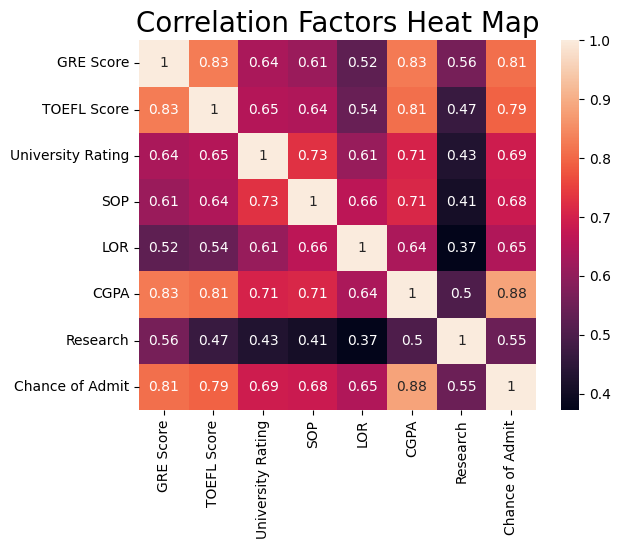

In [114]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [115]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [116]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [117]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [118]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [120]:
from sklearn.preprocessing  import  MinMaxScaler
scaler=MinMaxScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [121]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [122]:
X_train_scale

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [124]:
from tensorflow import keras 
import tensorflow as tf  
from tensorflow.keras.layers import Dense
from keras import Sequential

In [125]:
#MLP
model=Sequential()
model.add(Dense(7,activation ='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 7)                 56        
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [127]:
history= model.fit(X_train_scale,y_train,validation_split=0.2,epochs=25)

Epoch 1/25
10/10 [==============================] - 1s 16ms/step - loss: 0.5965 - val_loss: 0.6170
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5135 - val_loss: 0.5286
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.4363 - val_loss: 0.4444
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3607 - val_loss: 0.3598
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2774 - val_loss: 0.2689
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1963 - val_loss: 0.1786
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1227 - val_loss: 0.1031
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0674 - val_loss: 0.0520
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0324 - val_loss: 0.0243
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0142
Epoch 11/25
10/10 

In [128]:
y_pred=model.predict(X_test_scale)

4/4 [==============================] - 0s 1ms/step


In [129]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)


0.7300901643066047

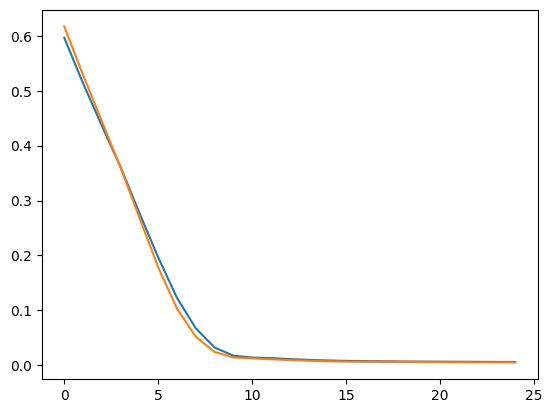

In [130]:
import matplotlib.pyplot as plt  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [134]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred)

0.7786894551518

In [132]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.0477464665055275
MSE: 0.00427400485024297
RMSE: 0.06537587360978796


In [137]:
y_test

304    0.62
340    0.75
47     0.89
67     0.57
479    0.79
       ... 
11     0.84
192    0.86
92     0.34
221    0.75
110    0.61
Name: Chance of Admit, Length: 100, dtype: float64

In [144]:
pd.DataFrame(y_pred)[0]

0     0.611931
1     0.705962
2     0.896799
3     0.722120
4     0.781940
        ...   
95    0.846870
96    0.852088
97    0.490953
98    0.724989
99    0.690767
Name: 0, Length: 100, dtype: float32

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_7080\1743668061.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pd.DataFrame(y_pred)[0],bins=50)


<AxesSubplot: ylabel='Density'>

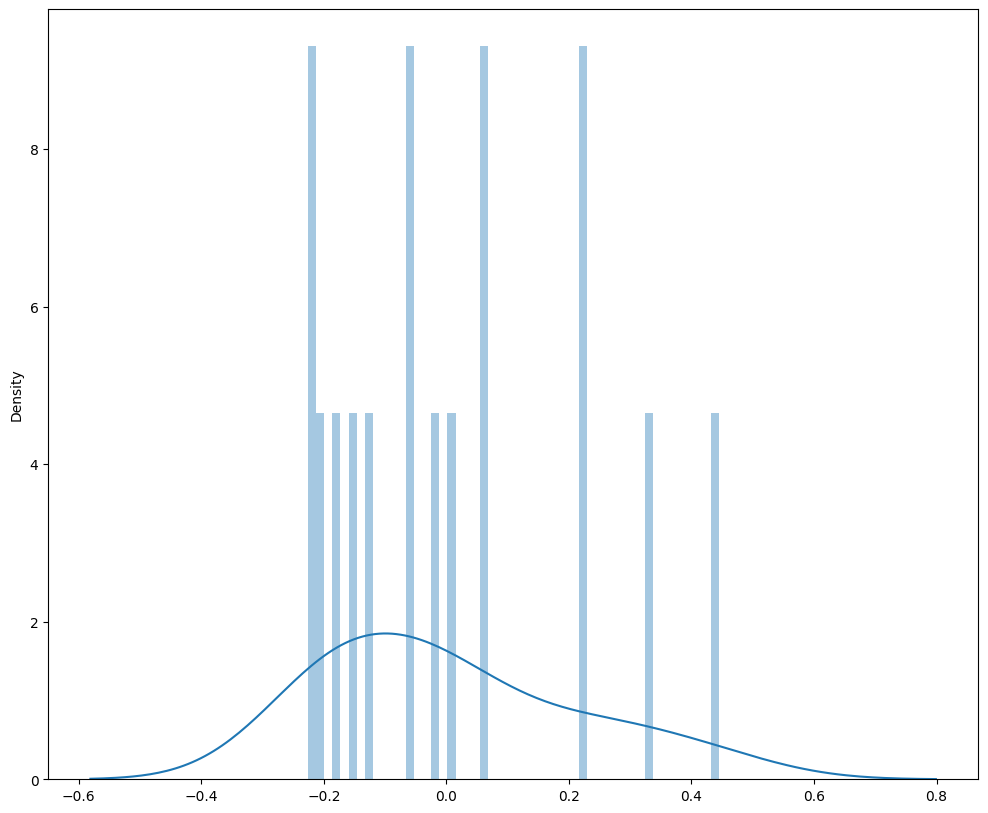

In [145]:
#Now we will visualize the differences between our predictions and actual y test data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.distplot(y_test-pd.DataFrame(y_pred)[0],bins=50)

## Classification MLP

In [164]:
#Weights

In [165]:
#zero-initialization-relu

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
df = pd.read_csv('ushape.csv')

In [168]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


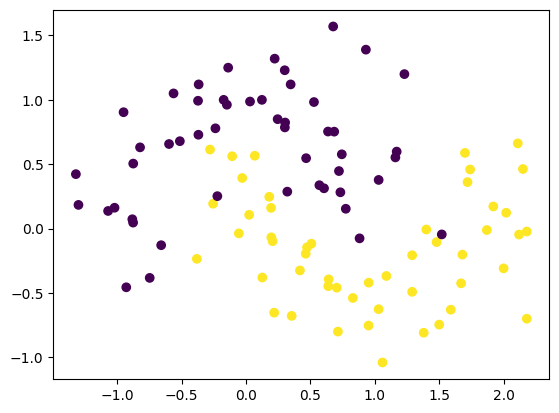

In [169]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [170]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [171]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [172]:
#MLP
model = Sequential()
model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 2)                 6         
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [173]:
# Set parameters to 0
model.get_weights()

[array([[ 1.0752572 , -0.9151691 ],
        [ 0.83479154,  0.51705337]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.55607367],
        [0.8237852 ]], dtype=float32),
 array([0.], dtype=float32)]

In [174]:
initial_weights = model.get_weights()

In [175]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [176]:
model.set_weights(initial_weights)

In [177]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [178]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [179]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 76ms/step - loss: 0.8635 - accuracy: 0.5000 - val_loss: 0.8362 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.8614 - accuracy: 0.5000 - val_loss: 0.8341 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.8590 - accuracy: 0.5000 - val_loss: 0.8320 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.8571 - accuracy: 0.5000 - val_loss: 0.8300 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.8548 - accuracy: 0.5000 - val_loss: 0.8280 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.8527 - accuracy: 0.5000 - val_loss: 0.8260 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8507 - accuracy: 0.5000 - val_loss: 0.8239 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 18ms/step - loss: 0.7664 - accuracy: 0.5000 - val_loss: 0.7457 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7652 - accuracy: 0.5000 - val_loss: 0.7446 - val_accuracy: 0.5000
Epoch 61/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7639 - accuracy: 0.5000 - val_loss: 0.7436 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7629 - accuracy: 0.5000 - val_loss: 0.7425 - val_accuracy: 0.5000
Epoch 63/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7619 - accuracy: 0.5000 - val_loss: 0.7415 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7606 - accuracy: 0.5000 - val_loss: 0.7405 - val_accuracy: 0.5000
Epoch 65/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7595 - accuracy: 0.5000 - val_loss: 0.7395 - val_accuracy: 0.5000
Epoch 66/100
3/3 [========

In [180]:
model.get_weights()

[array([[0.7096823 , 0.7096823 ],
        [0.24237297, 0.24237297]], dtype=float32),
 array([0.2765737, 0.2765737], dtype=float32),
 array([[0.26544562],
        [0.26544562]], dtype=float32),
 array([0.25289467], dtype=float32)]

9600/9600 [==============================] - 9s 942us/step


C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

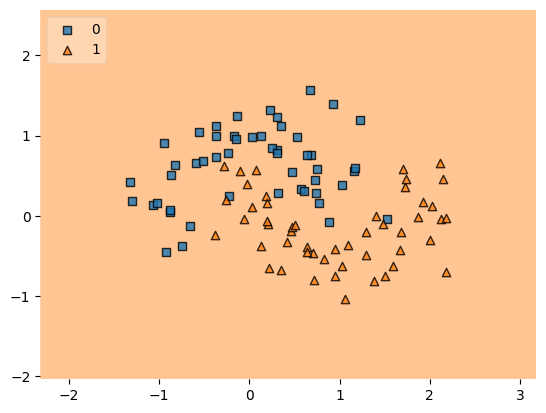

In [181]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [182]:
#zero-initialization-sigmoid

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ushape.csv')

df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


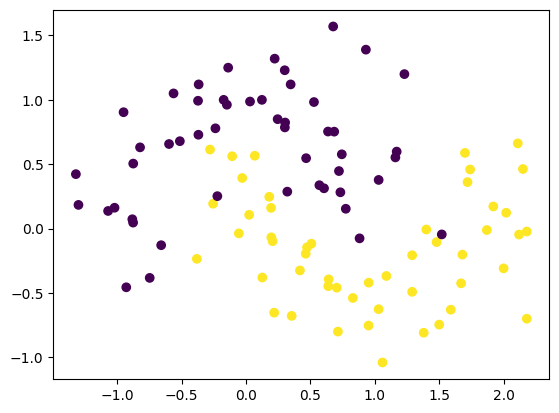

In [184]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [185]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [186]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [187]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                30        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [188]:
# Set parameters to 0
model.get_weights()

[array([[-0.00882488, -0.15811104,  0.16997337, -0.2452333 ,  0.4497853 ,
         -0.12968838, -0.48897627, -0.55529314,  0.35138267, -0.4109987 ],
        [ 0.37334245, -0.25559956,  0.47043854,  0.25159597,  0.41607958,
          0.39133352,  0.13542086,  0.49362522, -0.13317358,  0.67451495]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.58563304],
        [-0.2623027 ],
        [-0.63098836],
        [-0.42124984],
        [ 0.12125075],
        [-0.6740218 ],
        [-0.2542546 ],
        [-0.43448076],
        [-0.13499677],
        [ 0.27887958]], dtype=float32),
 array([0.], dtype=float32)]

In [189]:
initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

In [190]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [191]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [192]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 109ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 61/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 63/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6920 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6920 - accuracy: 0.5000 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 65/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 66/100
3/3 [========

In [193]:
model.get_weights()

[array([[ 0.3960444 ,  0.3960444 ,  0.3960444 ,  0.3960444 ,  0.3960444 ,
          0.3960444 ,  0.3960444 ,  0.3960444 ,  0.3960444 ,  0.3960444 ],
        [-0.42963547, -0.42963547, -0.42963547, -0.42963547, -0.42963547,
         -0.42963547, -0.42963547, -0.42963547, -0.42963547, -0.42963547]],
       dtype=float32),
 array([-0.12461848, -0.12461848, -0.12461848, -0.12461848, -0.12461848,
        -0.12461848, -0.12461848, -0.12461848, -0.12461848, -0.12461848],
       dtype=float32),
 array([[0.04216523],
        [0.04216523],
        [0.04216523],
        [0.04216523],
        [0.04216523],
        [0.04216523],
        [0.04216523],
        [0.04216523],
        [0.04216523],
        [0.04216523]], dtype=float32),
 array([-0.04502579], dtype=float32)]

9600/9600 [==============================] - 9s 929us/step


<AxesSubplot: >

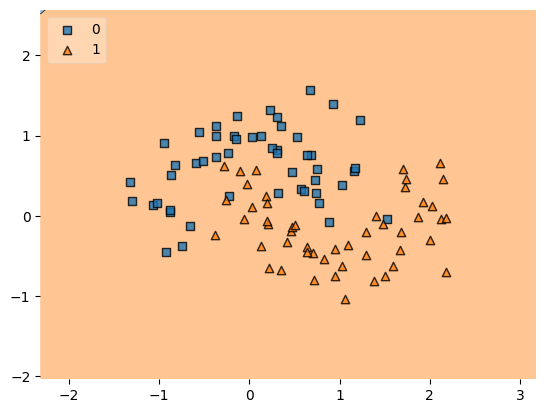

In [194]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [195]:
#He Init:

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv('ushape.csv')
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


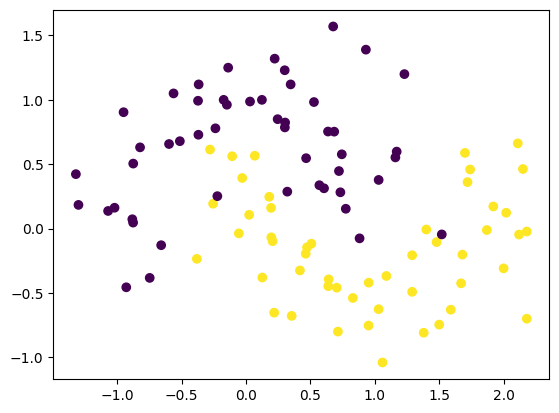

In [198]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [199]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [200]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [201]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                30        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.get_weights()

[array([[ 1.9133555 , -1.7268435 , -1.0953425 ,  0.11157177,  0.09678125,
          0.8642958 ,  0.109365  ,  1.0202678 ,  0.32557634, -0.29409084],
        [-0.2455453 , -0.8663701 ,  2.1693966 , -0.9657384 , -0.2221306 ,
          0.62286735,  1.3479718 , -0.5058296 , -0.5227263 ,  0.54795504]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.21916875,  0.531975  ,  0.8819036 ,  0.06753294,  0.7057906 ,
          0.6375088 , -0.64645463,  0.83271104, -0.48493513,  0.40194058],
        [-0.5419348 ,  0.43879363, -0.38606846, -0.48162636,  0.6645431 ,
         -0.5611349 ,  0.51392764,  0.72836095,  0.01715027, -0.13259524],
        [ 0.7698791 , -0.24954954, -0.25818077,  0.2883249 ,  0.44096652,
         -0.9858755 ,  0.5526102 , -0.07838556,  0.08816072, -0.5503802 ],
        [ 0.13876994,  0.66816086,  0.16710022, -0.18194754,  0.4569585 ,
          0.85161984, -0.21441996,  0.1101191 ,  0.3574265 ,  0.5477349 ],
        [ 0.03904

In [203]:
initial_weights = model.get_weights()

In [204]:
model.set_weights(initial_weights)

In [205]:
model.get_weights()

[array([[ 1.9133555 , -1.7268435 , -1.0953425 ,  0.11157177,  0.09678125,
          0.8642958 ,  0.109365  ,  1.0202678 ,  0.32557634, -0.29409084],
        [-0.2455453 , -0.8663701 ,  2.1693966 , -0.9657384 , -0.2221306 ,
          0.62286735,  1.3479718 , -0.5058296 , -0.5227263 ,  0.54795504]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.21916875,  0.531975  ,  0.8819036 ,  0.06753294,  0.7057906 ,
          0.6375088 , -0.64645463,  0.83271104, -0.48493513,  0.40194058],
        [-0.5419348 ,  0.43879363, -0.38606846, -0.48162636,  0.6645431 ,
         -0.5611349 ,  0.51392764,  0.72836095,  0.01715027, -0.13259524],
        [ 0.7698791 , -0.24954954, -0.25818077,  0.2883249 ,  0.44096652,
         -0.9858755 ,  0.5526102 , -0.07838556,  0.08816072, -0.5503802 ],
        [ 0.13876994,  0.66816086,  0.16710022, -0.18194754,  0.4569585 ,
          0.85161984, -0.21441996,  0.1101191 ,  0.3574265 ,  0.5477349 ],
        [ 0.03904

In [206]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [207]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 81ms/step - loss: 0.6721 - accuracy: 0.4875 - val_loss: 0.6273 - val_accuracy: 0.6500
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6398 - accuracy: 0.6000 - val_loss: 0.5976 - val_accuracy: 0.8500
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6106 - accuracy: 0.7750 - val_loss: 0.5678 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.5861 - accuracy: 0.7750 - val_loss: 0.5385 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.5610 - accuracy: 0.7750 - val_loss: 0.5124 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.5411 - accuracy: 0.7875 - val_loss: 0.4892 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5233 - accuracy: 0.7875 - val_loss: 0.4692 - val_accuracy: 0.8500
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 18ms/step - loss: 0.3202 - accuracy: 0.8750 - val_loss: 0.2116 - val_accuracy: 0.9500
Epoch 60/100
3/3 [==============================] - 0s 19ms/step - loss: 0.3193 - accuracy: 0.8750 - val_loss: 0.2112 - val_accuracy: 0.9500
Epoch 61/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3185 - accuracy: 0.8750 - val_loss: 0.2101 - val_accuracy: 0.9000
Epoch 62/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3178 - accuracy: 0.8750 - val_loss: 0.2092 - val_accuracy: 0.9000
Epoch 63/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3174 - accuracy: 0.8750 - val_loss: 0.2091 - val_accuracy: 0.9000
Epoch 64/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3163 - accuracy: 0.8750 - val_loss: 0.2083 - val_accuracy: 0.9000
Epoch 65/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3155 - accuracy: 0.8750 - val_loss: 0.2075 - val_accuracy: 0.9000
Epoch 66/100
3/3 [========

In [208]:
model.get_weights()

[array([[ 1.8750856 , -1.8931024 , -0.9208788 ,  0.07845522,  0.01036604,
          0.9228564 ,  0.11925992,  1.0799882 ,  0.32571077, -0.27043203],
        [-0.24454   , -0.862323  ,  2.3282332 , -1.1415706 , -0.11774388,
          0.67061573,  1.4273652 , -0.6007374 , -0.6494266 ,  0.6005971 ]],
       dtype=float32),
 array([-0.11714409,  0.00833031,  0.03504546,  0.10913933, -0.09444278,
         0.07414599,  0.06227158,  0.05205894,  0.00695158,  0.05639024],
       dtype=float32),
 array([[-0.07276308,  0.5907975 ,  0.81297415,  0.09080915,  0.7958732 ,
          0.60067356, -0.5915676 ,  0.7712923 , -0.42475867,  0.45140597],
        [-0.4441518 ,  0.35848367, -0.5585853 , -0.58928967,  0.7954326 ,
         -0.65288323,  0.67049754,  0.78086096,  0.07393798, -0.14468507],
        [ 0.8965373 , -0.34765032, -0.17726256,  0.2788653 ,  0.5193682 ,
         -0.7723046 ,  0.665172  , -0.12257916,  0.22225367, -0.6691211 ],
        [ 0.02576277,  0.7641582 ,  0.08632608, -0.17979132, 

9600/9600 [==============================] - 9s 946us/step


<AxesSubplot: >

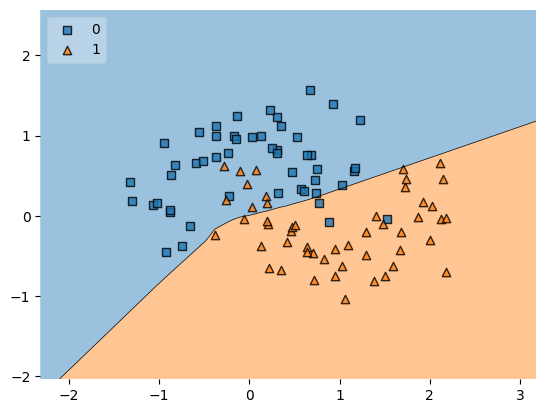

In [209]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [210]:
(np.random.randn(10,10)*0.01).min()

-0.024912279686017138

In [211]:
(np.random.randn(10,10)*0.01).max()

0.025697190989330508

In [212]:
#Batch-vs-stochastic-GD

In [213]:
import numpy as np
import pandas as pd
import time

In [214]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [215]:
df = df[['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [216]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [218]:
X_scaled.shape

(400, 2)

In [219]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [220]:
X_train.shape

(320, 2)

In [221]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [222]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                30        
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [223]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/500
320/320 [==============================] - 1s 2ms/step - loss: 0.4541 - accuracy: 0.8094 - val_loss: 0.6053 - val_accuracy: 0.6250
Epoch 2/500
320/320 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8313 - val_loss: 0.5441 - val_accuracy: 0.6375
Epoch 3/500
320/320 [==============================] - 1s 2ms/step - loss: 0.3114 - accuracy: 0.8281 - val_loss: 0.4955 - val_accuracy: 0.7000
Epoch 4/500
320/320 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8344 - val_loss: 0.4632 - val_accuracy: 0.7250
Epoch 5/500
320/320 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8375 - val_loss: 0.4368 - val_accuracy: 0.8125
Epoch 6/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8625 - val_loss: 0.4030 - val_accuracy: 0.8750
Epoch 7/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8625 - val_loss: 0.3692 - val_accuracy: 0.9125

Epoch 58/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.9000 - val_loss: 0.1611 - val_accuracy: 0.9625
Epoch 59/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.9000 - val_loss: 0.1708 - val_accuracy: 0.9625
Epoch 60/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.8969 - val_loss: 0.1742 - val_accuracy: 0.9625
Epoch 61/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.9031 - val_loss: 0.1742 - val_accuracy: 0.9625
Epoch 62/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.9062 - val_loss: 0.1731 - val_accuracy: 0.9625
Epoch 63/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.9062 - val_loss: 0.1713 - val_accuracy: 0.9625
Epoch 64/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.9062 - val_loss: 0.1750 - val_accuracy:

Epoch 115/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.9062 - val_loss: 0.1739 - val_accuracy: 0.9250
Epoch 116/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.9125 - val_loss: 0.1833 - val_accuracy: 0.9125
Epoch 117/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2798 - accuracy: 0.9125 - val_loss: 0.1700 - val_accuracy: 0.9250
Epoch 118/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.9125 - val_loss: 0.1850 - val_accuracy: 0.9125
Epoch 119/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.9062 - val_loss: 0.1765 - val_accuracy: 0.9250
Epoch 120/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.9125 - val_loss: 0.1824 - val_accuracy: 0.9125
Epoch 121/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.9094 - val_loss: 0.1904 - val_ac

320/320 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.9094 - val_loss: 0.1869 - val_accuracy: 0.9125
Epoch 172/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.9156 - val_loss: 0.1784 - val_accuracy: 0.9125
Epoch 173/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.9094 - val_loss: 0.1718 - val_accuracy: 0.9125
Epoch 174/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.9094 - val_loss: 0.1880 - val_accuracy: 0.9125
Epoch 175/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.9156 - val_loss: 0.1644 - val_accuracy: 0.9250
Epoch 176/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.9125 - val_loss: 0.1670 - val_accuracy: 0.9250
Epoch 177/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.9062 - val_loss: 0.1790 - val_accuracy: 0.9125

320/320 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.9094 - val_loss: 0.1556 - val_accuracy: 0.9500
Epoch 228/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2850 - accuracy: 0.9125 - val_loss: 0.1465 - val_accuracy: 0.9625
Epoch 229/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.9125 - val_loss: 0.1641 - val_accuracy: 0.9250
Epoch 230/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.9094 - val_loss: 0.1841 - val_accuracy: 0.9125
Epoch 231/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.9062 - val_loss: 0.1734 - val_accuracy: 0.9125
Epoch 232/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.9125 - val_loss: 0.1678 - val_accuracy: 0.9250
Epoch 233/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.9094 - val_loss: 0.1597 - val_accuracy: 0.9500

320/320 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.9062 - val_loss: 0.1850 - val_accuracy: 0.9250
Epoch 284/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.9094 - val_loss: 0.1637 - val_accuracy: 0.9500
Epoch 285/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.9094 - val_loss: 0.1495 - val_accuracy: 0.9625
Epoch 286/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.9094 - val_loss: 0.1922 - val_accuracy: 0.9250
Epoch 287/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9094 - val_loss: 0.1679 - val_accuracy: 0.9375
Epoch 288/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2833 - accuracy: 0.9031 - val_loss: 0.1752 - val_accuracy: 0.9375
Epoch 289/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.9125 - val_loss: 0.1813 - val_accuracy: 0.9375

320/320 [==============================] - 0s 1ms/step - loss: 0.2975 - accuracy: 0.9125 - val_loss: 0.1916 - val_accuracy: 0.9375
Epoch 340/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2786 - accuracy: 0.9125 - val_loss: 0.1653 - val_accuracy: 0.9500
Epoch 341/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.9062 - val_loss: 0.1755 - val_accuracy: 0.9375
Epoch 342/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.9062 - val_loss: 0.1823 - val_accuracy: 0.9375
Epoch 343/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.9125 - val_loss: 0.2089 - val_accuracy: 0.9375
Epoch 344/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.9094 - val_loss: 0.1913 - val_accuracy: 0.9375
Epoch 345/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.9094 - val_loss: 0.1706 - val_accuracy: 0.9375

320/320 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.9062 - val_loss: 0.2899 - val_accuracy: 0.9000
Epoch 396/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.9187 - val_loss: 0.2704 - val_accuracy: 0.9125
Epoch 397/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.9062 - val_loss: 0.2462 - val_accuracy: 0.9125
Epoch 398/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.9094 - val_loss: 0.2807 - val_accuracy: 0.9125
Epoch 399/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.9156 - val_loss: 0.2922 - val_accuracy: 0.9125
Epoch 400/500
320/320 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.9125 - val_loss: 0.2560 - val_accuracy: 0.9125
Epoch 401/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2731 - accuracy: 0.9062 - val_loss: 0.2825 - val_accuracy: 0.9125

320/320 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9094 - val_loss: 0.3307 - val_accuracy: 0.9000
Epoch 452/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.9125 - val_loss: 0.3144 - val_accuracy: 0.9000
Epoch 453/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2554 - accuracy: 0.9094 - val_loss: 0.2935 - val_accuracy: 0.9000
Epoch 454/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2576 - accuracy: 0.9062 - val_loss: 0.3033 - val_accuracy: 0.9000
Epoch 455/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2516 - accuracy: 0.9062 - val_loss: 0.2779 - val_accuracy: 0.9000
Epoch 456/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2597 - accuracy: 0.9094 - val_loss: 0.2858 - val_accuracy: 0.9000
Epoch 457/500
320/320 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.9094 - val_loss: 0.3654 - val_accuracy: 0.9000

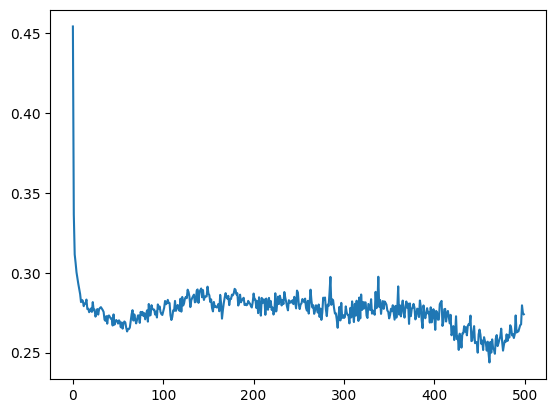

In [224]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [225]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [226]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 [==============================] - 1s 190ms/step - loss: 0.6921 - accuracy: 0.5250 - val_loss: 0.6644 - val_accuracy: 0.7125
Epoch 2/10
2/2 [==============================] - 0s 31ms/step - loss: 0.6775 - accuracy: 0.5875 - val_loss: 0.6644 - val_accuracy: 0.7500
Epoch 3/10
2/2 [==============================] - 0s 35ms/step - loss: 0.6689 - accuracy: 0.6156 - val_loss: 0.6647 - val_accuracy: 0.8000
Epoch 4/10
2/2 [==============================] - 0s 35ms/step - loss: 0.6617 - accuracy: 0.6656 - val_loss: 0.6651 - val_accuracy: 0.8375
Epoch 5/10
2/2 [==============================] - 0s 36ms/step - loss: 0.6555 - accuracy: 0.6812 - val_loss: 0.6654 - val_accuracy: 0.8250
Epoch 6/10
2/2 [==============================] - 0s 40ms/step - loss: 0.6499 - accuracy: 0.6969 - val_loss: 0.6657 - val_accuracy: 0.8500
Epoch 7/10
2/2 [==============================] - 0s 33ms/step - loss: 0.6445 - accuracy: 0.7437 - val_loss: 0.6656 - val_accuracy: 0.8625
Epoch 8/10
2/2 [==========

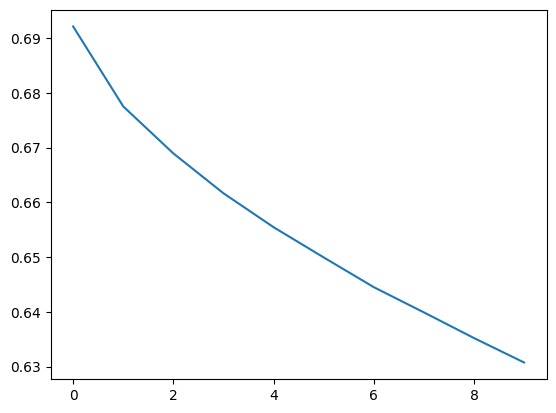

In [227]:
plt.plot(history.history['loss'])

In [228]:
#backpropagation-regression

In [229]:
import numpy as np
import pandas as pd

In [230]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [231]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [232]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [233]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b
  
  return Z

In [234]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev

In [235]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

In [236]:
y_hat = y_hat[0][0]

In [237]:
A1

array([[1.6],
       [1.6]])

In [238]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [239]:
update_parameters(parameters,y,y_hat,A1,X)

In [240]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [241]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [242]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]),
 'b1': array([[0.0019667],
        [0.0019667]]),
 'W2': array([[0.12712927],
        [0.12712927]]),
 'b2': array([[0.13612818]])}

In [243]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.12409711, 0.13272353],
        [0.12412266, 0.13276611]]),
 'b1': array([[0.00355129],
        [0.00355555]]),
 'W2': array([[0.14692424],
        [0.14731907]]),
 'b2': array([[0.15810417]])}

In [244]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.13482804, 0.15847776],
        [0.1349909 , 0.15884991]]),
 'b1': array([[0.00569748],
        [0.0057292 ]]),
 'W2': array([[0.17312488],
        [0.17534027]]),
 'b2': array([[0.18773702]])}

In [245]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}

### Weights

###  weights are parameters that define the strength of connections between neurons in a neural network. They play a critical role in shaping the network's behavior and its ability to learn from data. Here's how weights are used:

### Feature Representation: Weights determine how input features are combined and transformed as they pass through the network's layers. This enables the network to learn hierarchical representations of data, capturing increasingly complex features.

### Information Flow: Weights control the flow of information between neurons. Adjusting weights alters the influence of different neurons, affecting the computations and activations of subsequent layers.

### Learning Patterns: During training, weights are adjusted to minimize the difference between predicted outputs and actual targets. This process, known as backpropagation, allows the network to learn patterns and relationships in the data.

### Task-specific Adaptation: Weights are adapted to specific tasks like image classification, language translation, or speech recognition. They allow the network to specialize in different tasks by fine-tuning their values.

### Model Optimization: Optimizing weights through algorithms like stochastic gradient descent improves the model's ability to make accurate predictions by minimizing the chosen loss function.

### Generalization: Properly learned weights help the network generalize from training data to new, unseen examples. They prevent overfitting and ensure the model's performance on unseen data.

### Transfer Learning: Pre-trained weights from one task can be used as a starting point for related tasks, saving time and resources during model development.

### Interpretability: Analyzing learned weights can provide insights into which features or components the network is focusing on, aiding in understanding the decision-making process.

### In summary, weights are the knobs that the neural network adjusts to learn from data, represent features, optimize performance, and make predictions. They are central to the functioning and learning capability of deep learning models.


In [246]:
#backpropagation-classification

In [247]:
import numpy as np
import pandas as pd

In [248]:
df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns=['cgpa', 'profile_score', 'placed'])
df

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1
2,6,10,0
3,5,5,0


In [249]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [250]:
# Utility Functions
def sigmoid(Z):
  
  A = 1/(1+np.exp(-Z))

  return A

In [251]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b

  A = sigmoid(Z)
  
  return A

In [252]:
# L-layer feed forward

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev

In [253]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [254]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.613402628898913


{'W1': array([[0.10000513, 0.10000513],
        [0.10000513, 0.10000513]]),
 'b1': array([[6.41054186e-07],
        [6.41054186e-07]]),
 'W2': array([[0.10003815],
        [0.10003815]]),
 'b2': array([[0.100084]])}

In [255]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.568725622654268


{'W1': array([[0.10000937, 0.10001059],
        [0.10000937, 0.10001059]]),
 'b1': array([[1.24770113e-06],
        [1.24770113e-06]]),
 'W2': array([[0.10007424],
        [0.10007424]]),
 'b2': array([[0.10011761]])}

In [256]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8353333695154365


{'W1': array([[0.10000463, 0.10000267],
        [0.10000463, 0.10000267]]),
 'b1': array([[4.56125378e-07],
        [4.56135584e-07]]),
 'W2': array([[0.10002712],
        [0.10002712]]),
 'b2': array([[0.09997049]])}

In [257]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8238180133031612


{'W1': array([[0.09999911, 0.09999716],
        [0.09999911, 0.09999716]]),
 'b1': array([[-6.47175329e-07],
        [-6.47175081e-07]]),
 'W2': array([[0.09998609],
        [0.09998609]]),
 'b2': array([[0.09992997]])}

In [258]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 50

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['placed']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  0.7103199085929446
Epoch -  2 Loss -  0.6991702892802629
Epoch -  3 Loss -  0.6991679314811485
Epoch -  4 Loss -  0.6991655746710999
Epoch -  5 Loss -  0.6991632188496667
Epoch -  6 Loss -  0.699160864016399
Epoch -  7 Loss -  0.6991585101708473
Epoch -  8 Loss -  0.6991561573125619
Epoch -  9 Loss -  0.6991538054410936
Epoch -  10 Loss -  0.6991514545559935
Epoch -  11 Loss -  0.6991491046568126
Epoch -  12 Loss -  0.6991467557431024
Epoch -  13 Loss -  0.6991444078144144
Epoch -  14 Loss -  0.6991420608703007
Epoch -  15 Loss -  0.6991397149103132
Epoch -  16 Loss -  0.6991373699340042
Epoch -  17 Loss -  0.6991350259409265
Epoch -  18 Loss -  0.6991326829306324
Epoch -  19 Loss -  0.6991303409026751
Epoch -  20 Loss -  0.699127999856608
Epoch -  21 Loss -  0.6991256597919842
Epoch -  22 Loss -  0.6991233207083575
Epoch -  23 Loss -  0.6991209826052818
Epoch -  24 Loss -  0.699118645482311
Epoch -  25 Loss -  0.6991163093389996
Epoch -  26 Loss -  0.699113974174902

{'W1': array([[0.09994267, 0.09984548],
        [0.09994272, 0.09984548]]),
 'b1': array([[-3.38405750e-05],
        [-3.38419977e-05]]),
 'W2': array([[0.09920806],
        [0.09920816]]),
 'b2': array([[0.09915209]])}

In [259]:
#Early Stopping In Neural Networks

In [260]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [261]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [262]:
X[:,1]
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

<AxesSubplot: >

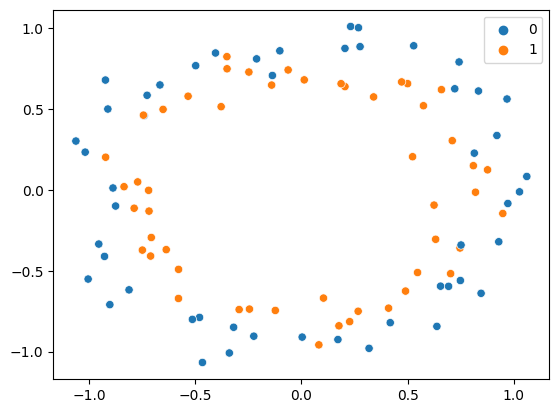

In [263]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [265]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [266]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [267]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

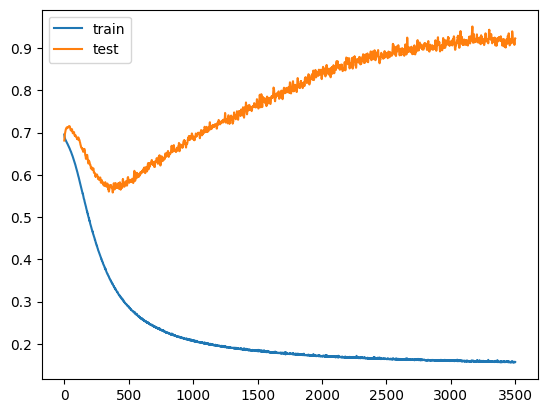

In [268]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 11s 1ms/step


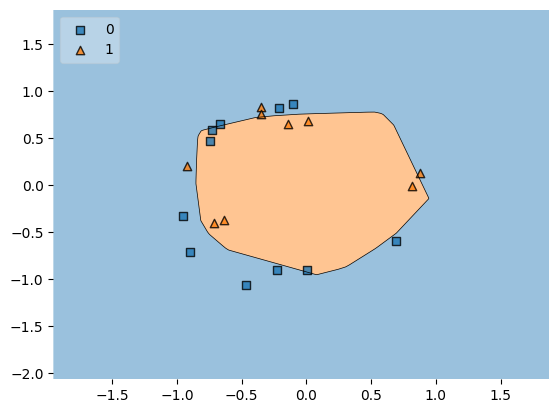

In [269]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [270]:
#Early Stopping
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 73ms/step - loss: 0.6976 - accuracy: 0.4500 - val_loss: 0.6796 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6949 - accuracy: 0.4625 - val_loss: 0.6835 - val_accuracy: 0.5000
Epoch 3/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.6928 - accuracy: 0.4500 - val_loss: 0.6869 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.6906 - accuracy: 0.4500 - val_loss: 0.6893 - val_accuracy: 0.5500
Epoch 5/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.6891 - accuracy: 0.4625 - val_loss: 0.6923 - val_accuracy: 0.5500
Epoch 6/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.6885 - accuracy: 0.5000 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 7/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6867 - accuracy: 0.5625 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 8/3500


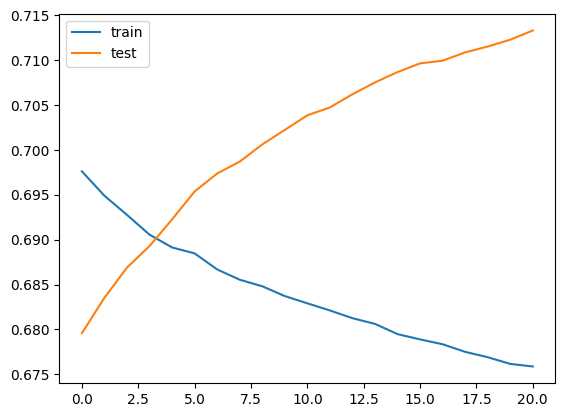

In [271]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 8s 865us/step


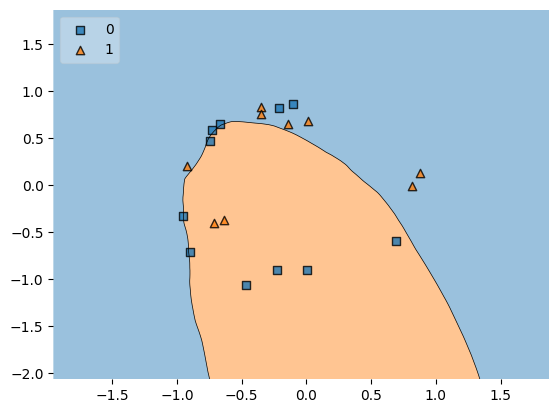

In [272]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [273]:
#Feature Scaling in ANN

In [274]:
import numpy as np
import pandas as pd

In [275]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [276]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [277]:
import seaborn as sns

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

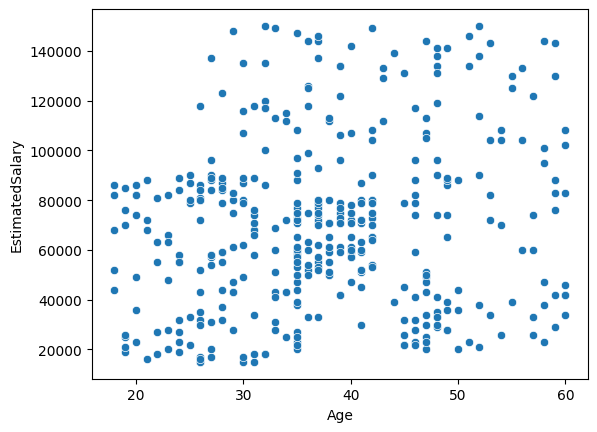

In [278]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [279]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [280]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [281]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [282]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               384       
                                                                 
 dense_37 (Dense)            (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [283]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [284]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 17ms/step - loss: 8596.0137 - accuracy: 0.6531 - val_loss: 6985.2734 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 4380.1870 - accuracy: 0.6531 - val_loss: 2095.9922 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 802.2250 - accuracy: 0.5156 - val_loss: 971.7933 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 529.8610 - accuracy: 0.4719 - val_loss: 642.8192 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 318.3625 - accuracy: 0.5844 - val_loss: 367.9695 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 253.2032 - accuracy: 0.5344 - val_loss: 201.6551 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 172.0344 - accuracy: 0.5094 - val_loss: 299.1600 - v

10/10 [==============================] - 0s 4ms/step - loss: 103.0717 - accuracy: 0.4906 - val_loss: 35.6486 - val_accuracy: 0.4000
Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 61.5108 - accuracy: 0.5531 - val_loss: 61.1666 - val_accuracy: 0.6000
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 48.5660 - accuracy: 0.5469 - val_loss: 76.8243 - val_accuracy: 0.4000
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 104.4923 - accuracy: 0.5156 - val_loss: 173.3600 - val_accuracy: 0.4000
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 167.0019 - accuracy: 0.5594 - val_loss: 138.7841 - val_accuracy: 0.4000
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 141.6566 - accuracy: 0.4812 - val_loss: 6.8200 - val_accuracy: 0.6000
Epoch 63/100
10/10 [==============================] - 0s 4ms/step - loss: 140.0504 - accuracy: 0.5031 - val_loss: 165.7317 - val_accuracy: 0.600

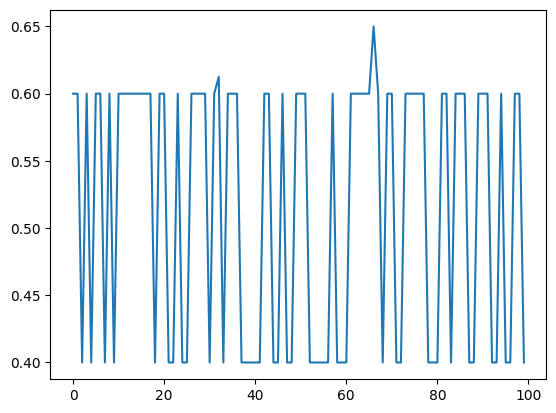

In [285]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [286]:
# Applying scaling

In [287]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [288]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<AxesSubplot: >

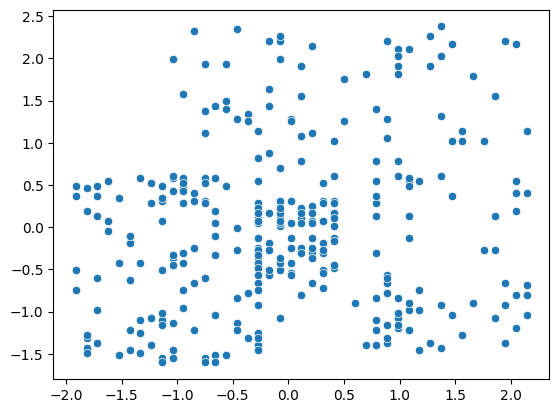

In [289]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [290]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 23ms/step - loss: 0.6952 - accuracy: 0.4437 - val_loss: 0.6552 - val_accuracy: 0.8375
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.8219 - val_loss: 0.5947 - val_accuracy: 0.8875
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5840 - accuracy: 0.8531 - val_loss: 0.5455 - val_accuracy: 0.8875
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5406 - accuracy: 0.8656 - val_loss: 0.5043 - val_accuracy: 0.8750
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.8687 - val_loss: 0.4688 - val_accuracy: 0.8250
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4741 - accuracy: 0.8719 - val_loss: 0.4390 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4454 - accuracy: 0.8687 - val_loss: 0.4147 - val_accuracy: 0.8375
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2367 - accuracy: 0.9062 - val_loss: 0.2644 - val_accuracy: 0.9250
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9062 - val_loss: 0.2636 - val_accuracy: 0.9250
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9062 - val_loss: 0.2638 - val_accuracy: 0.9250
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.9062 - val_loss: 0.2649 - val_accuracy: 0.9250
Epoch 63/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2357 - accuracy: 0.9062 - val_loss: 0.2643 - val_accuracy: 0.9250
Epoch 64/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.9062 - val_loss: 0.2637 - val_accuracy: 0.9250
Epoch 65/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2347 - accuracy: 0.9062 - val_loss: 0.2638 - val_accuracy: 0.9250
Epoch 

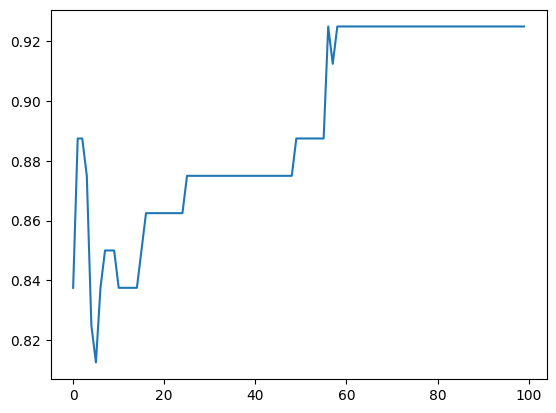

In [291]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [292]:
#Dropout Layers in ANN

In [293]:
import numpy as np
import matplotlib.pyplot as plt

In [294]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [295]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

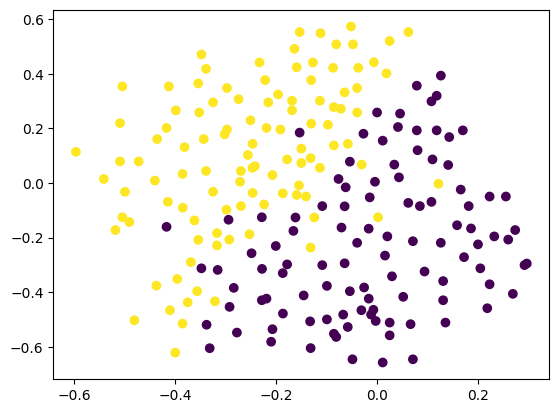

In [296]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [297]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [298]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 30ms/step - loss: 0.5590 - accuracy: 0.7738 - val_loss: 0.6282 - val_accuracy: 0.6047
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2672 - accuracy: 0.8750 - val_loss: 0.6466 - val_accuracy: 0.6744
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2337 - accuracy: 0.8869 - val_loss: 0.3073 - val_accuracy: 0.8605
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2810 - accuracy: 0.8929 - val_loss: 0.2954 - val_accuracy: 0.8837
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2729 - accuracy: 0.8988 - val_loss: 0.3825 - val_accuracy: 0.8140
Epoch 6/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2362 - accuracy: 0.9048 - val_loss: 0.3938 - val_accuracy: 0.8140
Epoch 7/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2083 - accuracy: 0.9048 - val_loss: 0.4230 - val_accuracy: 0.8372
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 7ms/step - loss: 0.1435 - accuracy: 0.9345 - val_loss: 0.3849 - val_accuracy: 0.9302
Epoch 60/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1464 - accuracy: 0.9405 - val_loss: 0.5531 - val_accuracy: 0.8372
Epoch 61/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1387 - accuracy: 0.9286 - val_loss: 0.5154 - val_accuracy: 0.8372
Epoch 62/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1332 - accuracy: 0.9583 - val_loss: 0.4347 - val_accuracy: 0.8837
Epoch 63/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1307 - accuracy: 0.9524 - val_loss: 0.5126 - val_accuracy: 0.8372
Epoch 64/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1691 - accuracy: 0.9226 - val_loss: 0.5381 - val_accuracy: 0.8372
Epoch 65/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1775 - accuracy: 0.9226 - val_loss: 0.4133 - val_accuracy: 0.8605
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 0.1660 - accuracy: 0.9345 - val_loss: 0.9067 - val_accuracy: 0.8140
Epoch 118/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1115 - accuracy: 0.9464 - val_loss: 0.5865 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1198 - accuracy: 0.9524 - val_loss: 0.7681 - val_accuracy: 0.8605
Epoch 120/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1110 - accuracy: 0.9464 - val_loss: 1.0916 - val_accuracy: 0.7209
Epoch 121/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1045 - accuracy: 0.9524 - val_loss: 0.8200 - val_accuracy: 0.8140
Epoch 122/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0937 - accuracy: 0.9583 - val_loss: 0.6744 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0927 - accuracy: 0.9583 - val_loss: 0.7215 - val_accuracy: 0.8837
Epoch 124/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1579 - accuracy: 0.9286 - val_loss: 0.5387 - val_accuracy: 0.9070
Epoch 176/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1488 - accuracy: 0.9226 - val_loss: 0.7900 - val_accuracy: 0.8372
Epoch 177/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1352 - accuracy: 0.9464 - val_loss: 0.8696 - val_accuracy: 0.8372
Epoch 178/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1195 - accuracy: 0.9643 - val_loss: 0.7821 - val_accuracy: 0.8605
Epoch 179/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1187 - accuracy: 0.9524 - val_loss: 0.8843 - val_accuracy: 0.8372
Epoch 180/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1236 - accuracy: 0.9524 - val_loss: 0.9364 - val_accuracy: 0.8372
Epoch 181/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1089 - accuracy: 0.9464 - val_loss: 1.0515 - val_accuracy: 0.7907
Epoch 182/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1274 - accuracy: 0.9583 - val_loss: 0.7751 - val_accuracy: 0.9070
Epoch 234/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1194 - accuracy: 0.9524 - val_loss: 0.7684 - val_accuracy: 0.8837
Epoch 235/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1147 - accuracy: 0.9524 - val_loss: 0.7890 - val_accuracy: 0.8372
Epoch 236/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0986 - accuracy: 0.9643 - val_loss: 0.8960 - val_accuracy: 0.8605
Epoch 237/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0991 - accuracy: 0.9524 - val_loss: 1.1440 - val_accuracy: 0.8140
Epoch 238/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0863 - accuracy: 0.9583 - val_loss: 0.9797 - val_accuracy: 0.9070
Epoch 239/500
6/6 [==============================] - 0s 6ms/step - loss: 0.1090 - accuracy: 0.9583 - val_loss: 1.0285 - val_accuracy: 0.8605
Epoch 240/500
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 1.3622 - val_accuracy: 0.8372
Epoch 292/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0490 - accuracy: 0.9821 - val_loss: 1.4532 - val_accuracy: 0.8372
Epoch 293/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0399 - accuracy: 0.9821 - val_loss: 1.4592 - val_accuracy: 0.8372
Epoch 294/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0451 - accuracy: 0.9881 - val_loss: 1.3409 - val_accuracy: 0.8372
Epoch 295/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0420 - accuracy: 0.9881 - val_loss: 1.4498 - val_accuracy: 0.8372
Epoch 296/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0395 - accuracy: 0.9821 - val_loss: 1.4288 - val_accuracy: 0.8372
Epoch 297/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0414 - accuracy: 0.9881 - val_loss: 1.4142 - val_accuracy: 0.8372
Epoch 298/500
6/6 [=======

6/6 [==============================] - 0s 7ms/step - loss: 0.0884 - accuracy: 0.9643 - val_loss: 1.1366 - val_accuracy: 0.9302
Epoch 350/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0940 - accuracy: 0.9583 - val_loss: 1.1464 - val_accuracy: 0.8837
Epoch 351/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0831 - accuracy: 0.9583 - val_loss: 1.2352 - val_accuracy: 0.8140
Epoch 352/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0751 - accuracy: 0.9702 - val_loss: 1.1948 - val_accuracy: 0.8837
Epoch 353/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0685 - accuracy: 0.9762 - val_loss: 1.1937 - val_accuracy: 0.8837
Epoch 354/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0698 - accuracy: 0.9702 - val_loss: 1.2206 - val_accuracy: 0.8837
Epoch 355/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0655 - accuracy: 0.9762 - val_loss: 1.2074 - val_accuracy: 0.8837
Epoch 356/500
6/6 [=======

6/6 [==============================] - 0s 6ms/step - loss: 0.0404 - accuracy: 0.9881 - val_loss: 1.7522 - val_accuracy: 0.8372
Epoch 408/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0663 - accuracy: 0.9643 - val_loss: 1.6618 - val_accuracy: 0.8140
Epoch 409/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0492 - accuracy: 0.9821 - val_loss: 1.5773 - val_accuracy: 0.8372
Epoch 410/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0457 - accuracy: 0.9881 - val_loss: 1.5345 - val_accuracy: 0.8372
Epoch 411/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0866 - accuracy: 0.9643 - val_loss: 1.6193 - val_accuracy: 0.8372
Epoch 412/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0775 - accuracy: 0.9702 - val_loss: 1.6860 - val_accuracy: 0.8372
Epoch 413/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1391 - accuracy: 0.9583 - val_loss: 1.7641 - val_accuracy: 0.8372
Epoch 414/500
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.0503 - accuracy: 0.9762 - val_loss: 1.7854 - val_accuracy: 0.8372
Epoch 466/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9881 - val_loss: 1.8737 - val_accuracy: 0.8140
Epoch 467/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0406 - accuracy: 0.9821 - val_loss: 2.0127 - val_accuracy: 0.8140
Epoch 468/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 0.9821 - val_loss: 2.0830 - val_accuracy: 0.8140
Epoch 469/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.9821 - val_loss: 2.1391 - val_accuracy: 0.8140
Epoch 470/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0290 - accuracy: 0.9821 - val_loss: 1.9799 - val_accuracy: 0.8140
Epoch 471/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0276 - accuracy: 0.9940 - val_loss: 1.9487 - val_accuracy: 0.8140
Epoch 472/500
6/6 [========

In [299]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 9s 978us/step


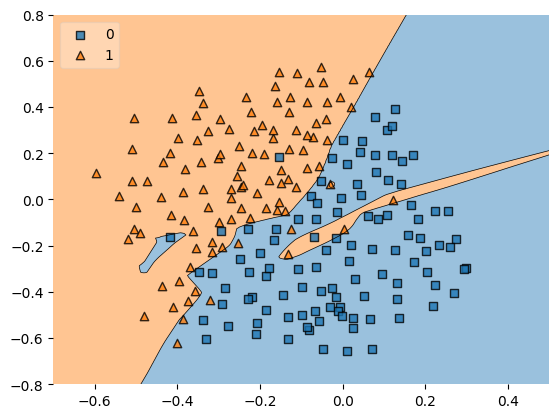

In [300]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

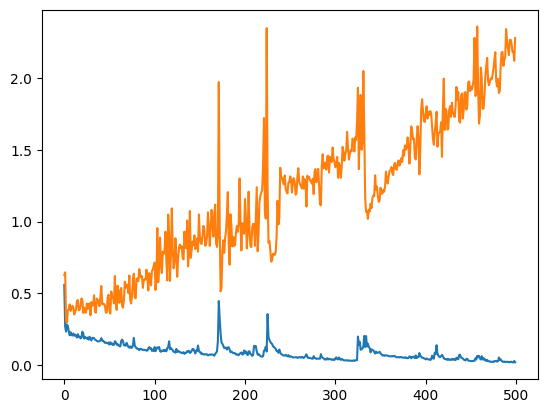

In [301]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

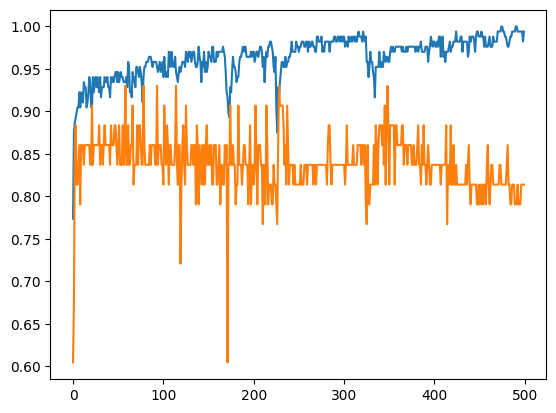

In [302]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [303]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 34ms/step - loss: 0.5821 - accuracy: 0.7679 - val_loss: 0.6009 - val_accuracy: 0.6279
Epoch 2/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3128 - accuracy: 0.8750 - val_loss: 0.7075 - val_accuracy: 0.6744
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2488 - accuracy: 0.8988 - val_loss: 0.4867 - val_accuracy: 0.7442
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2587 - accuracy: 0.8988 - val_loss: 0.3395 - val_accuracy: 0.8605
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2839 - accuracy: 0.8869 - val_loss: 0.3024 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2718 - accuracy: 0.8869 - val_loss: 0.3788 - val_accuracy: 0.8140
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2503 - accuracy: 0.8810 - val_loss: 0.3774 - val_accuracy: 0.8605
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 8ms/step - loss: 0.1979 - accuracy: 0.9286 - val_loss: 0.4629 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2010 - accuracy: 0.9107 - val_loss: 0.4393 - val_accuracy: 0.8372
Epoch 61/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1811 - accuracy: 0.9286 - val_loss: 0.3426 - val_accuracy: 0.9070
Epoch 62/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2026 - accuracy: 0.9048 - val_loss: 0.3654 - val_accuracy: 0.8837
Epoch 63/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1852 - accuracy: 0.9226 - val_loss: 0.4294 - val_accuracy: 0.8605
Epoch 64/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2009 - accuracy: 0.9167 - val_loss: 0.4158 - val_accuracy: 0.8605
Epoch 65/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2384 - accuracy: 0.9107 - val_loss: 0.3980 - val_accuracy: 0.8605
Epoch 66/500
6/6 [=============

6/6 [==============================] - 0s 42ms/step - loss: 0.2032 - accuracy: 0.8988 - val_loss: 0.5324 - val_accuracy: 0.8372
Epoch 118/500
6/6 [==============================] - 0s 42ms/step - loss: 0.1606 - accuracy: 0.9405 - val_loss: 0.5426 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1584 - accuracy: 0.9345 - val_loss: 0.5993 - val_accuracy: 0.8372
Epoch 120/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2109 - accuracy: 0.9107 - val_loss: 0.4082 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1867 - accuracy: 0.9226 - val_loss: 0.4259 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1941 - accuracy: 0.9226 - val_loss: 0.4205 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1531 - accuracy: 0.9345 - val_loss: 0.4737 - val_accuracy: 0.8605
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1828 - accuracy: 0.9286 - val_loss: 0.5746 - val_accuracy: 0.8605
Epoch 176/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1795 - accuracy: 0.9405 - val_loss: 0.6194 - val_accuracy: 0.8372
Epoch 177/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1626 - accuracy: 0.9345 - val_loss: 0.6066 - val_accuracy: 0.8605
Epoch 178/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1939 - accuracy: 0.9167 - val_loss: 0.5309 - val_accuracy: 0.8605
Epoch 179/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2017 - accuracy: 0.9286 - val_loss: 0.5117 - val_accuracy: 0.8605
Epoch 180/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1682 - accuracy: 0.9405 - val_loss: 0.5654 - val_accuracy: 0.8605
Epoch 181/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1753 - accuracy: 0.9345 - val_loss: 0.5241 - val_accuracy: 0.8605
Epoch 182/50

Epoch 233/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1937 - accuracy: 0.9345 - val_loss: 0.4662 - val_accuracy: 0.8837
Epoch 234/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1778 - accuracy: 0.9226 - val_loss: 0.5097 - val_accuracy: 0.8837
Epoch 235/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1626 - accuracy: 0.9226 - val_loss: 0.5445 - val_accuracy: 0.8605
Epoch 236/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1638 - accuracy: 0.9345 - val_loss: 0.6019 - val_accuracy: 0.8605
Epoch 237/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1602 - accuracy: 0.9286 - val_loss: 0.7524 - val_accuracy: 0.8605
Epoch 238/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1731 - accuracy: 0.9405 - val_loss: 0.7154 - val_accuracy: 0.8605
Epoch 239/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1953 - accuracy: 0.9107 - val_loss: 0.5784 - val_accuracy: 0.8605
Epoch 240/

6/6 [==============================] - 0s 8ms/step - loss: 0.1746 - accuracy: 0.9286 - val_loss: 0.8895 - val_accuracy: 0.8605
Epoch 292/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1574 - accuracy: 0.9167 - val_loss: 0.8468 - val_accuracy: 0.8372
Epoch 293/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1656 - accuracy: 0.9226 - val_loss: 0.6470 - val_accuracy: 0.8372
Epoch 294/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1433 - accuracy: 0.9464 - val_loss: 0.5693 - val_accuracy: 0.8837
Epoch 295/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1562 - accuracy: 0.9524 - val_loss: 1.1550 - val_accuracy: 0.8372
Epoch 296/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1813 - accuracy: 0.9464 - val_loss: 0.9911 - val_accuracy: 0.8605
Epoch 297/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1527 - accuracy: 0.9405 - val_loss: 0.7723 - val_accuracy: 0.8605
Epoch 298/500
6/6 [=======

6/6 [==============================] - 0s 10ms/step - loss: 0.1180 - accuracy: 0.9464 - val_loss: 0.7221 - val_accuracy: 0.8605
Epoch 350/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1944 - accuracy: 0.9048 - val_loss: 0.7174 - val_accuracy: 0.8605
Epoch 351/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1495 - accuracy: 0.9286 - val_loss: 0.7157 - val_accuracy: 0.8605
Epoch 352/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1612 - accuracy: 0.9286 - val_loss: 0.6552 - val_accuracy: 0.8372
Epoch 353/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1593 - accuracy: 0.9405 - val_loss: 0.5667 - val_accuracy: 0.8837
Epoch 354/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1484 - accuracy: 0.9405 - val_loss: 0.5492 - val_accuracy: 0.8837
Epoch 355/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1580 - accuracy: 0.9345 - val_loss: 0.5915 - val_accuracy: 0.8837
Epoch 356/500
6/6 [=

6/6 [==============================] - 0s 9ms/step - loss: 0.1256 - accuracy: 0.9464 - val_loss: 0.9197 - val_accuracy: 0.8605
Epoch 408/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1058 - accuracy: 0.9405 - val_loss: 0.9545 - val_accuracy: 0.8605
Epoch 409/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1444 - accuracy: 0.9345 - val_loss: 0.9412 - val_accuracy: 0.8605
Epoch 410/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1379 - accuracy: 0.9405 - val_loss: 0.8281 - val_accuracy: 0.8837
Epoch 411/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1752 - accuracy: 0.9167 - val_loss: 0.8907 - val_accuracy: 0.8372
Epoch 412/500
6/6 [==============================] - 0s 7ms/step - loss: 0.1597 - accuracy: 0.9345 - val_loss: 0.9655 - val_accuracy: 0.8372
Epoch 413/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1649 - accuracy: 0.9345 - val_loss: 0.9565 - val_accuracy: 0.8372
Epoch 414/500
6/6 [========

6/6 [==============================] - 0s 8ms/step - loss: 0.1308 - accuracy: 0.9583 - val_loss: 0.8629 - val_accuracy: 0.8605
Epoch 466/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1493 - accuracy: 0.9405 - val_loss: 0.9356 - val_accuracy: 0.8605
Epoch 467/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1596 - accuracy: 0.9286 - val_loss: 1.0659 - val_accuracy: 0.8605
Epoch 468/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1415 - accuracy: 0.9405 - val_loss: 1.0841 - val_accuracy: 0.8372
Epoch 469/500
6/6 [==============================] - 0s 9ms/step - loss: 0.1790 - accuracy: 0.9464 - val_loss: 0.9087 - val_accuracy: 0.8372
Epoch 470/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1488 - accuracy: 0.9464 - val_loss: 0.7367 - val_accuracy: 0.8372
Epoch 471/500
6/6 [==============================] - 0s 8ms/step - loss: 0.1542 - accuracy: 0.9464 - val_loss: 0.6869 - val_accuracy: 0.8605
Epoch 472/500
6/6 [========

9600/9600 [==============================] - 11s 1ms/step


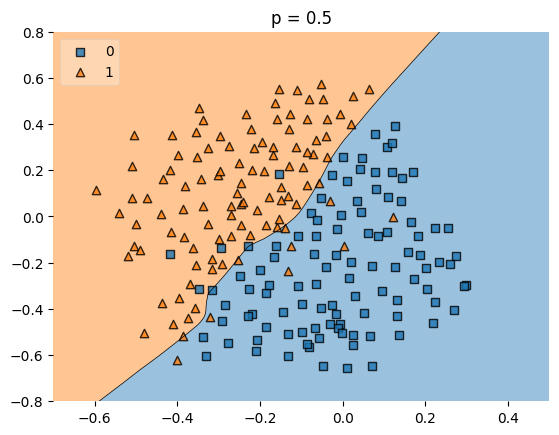

In [304]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

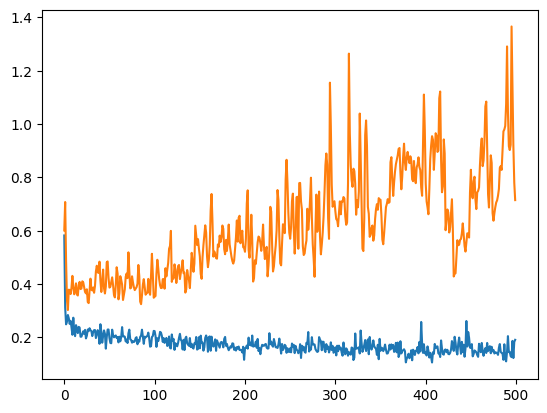

In [305]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

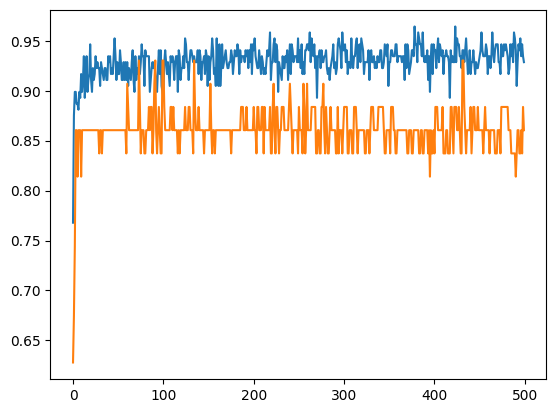

In [306]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [307]:
#Regression Dropout

In [308]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [309]:
X_train = np.linspace(-1, 1, 20)

In [310]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [311]:
X_test = np.linspace(-1, 1, 20)

In [312]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

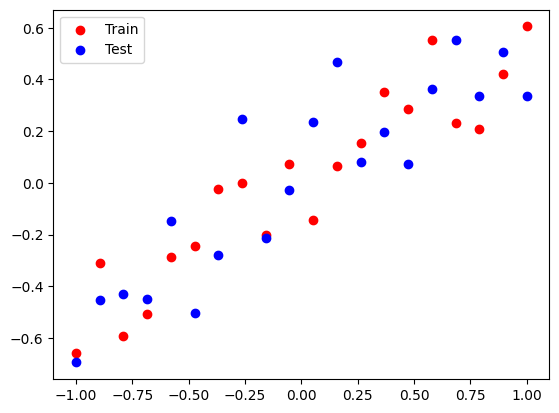

In [313]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [314]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

In [315]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0011064453283324838, Test: 0.044584691524505615


In [316]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 68ms/step


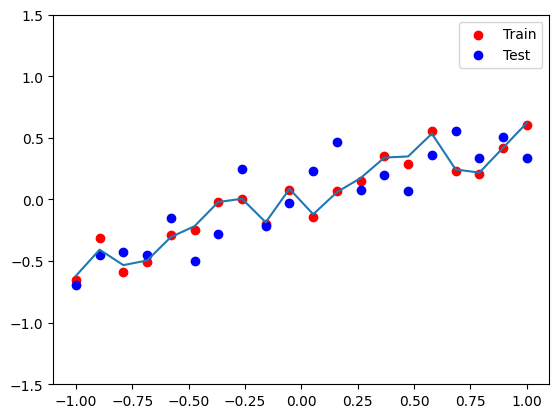

In [317]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [318]:
#with dropout

In [319]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [320]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.011913484893739223, Test: 0.03794411942362785


In [321]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 66ms/step


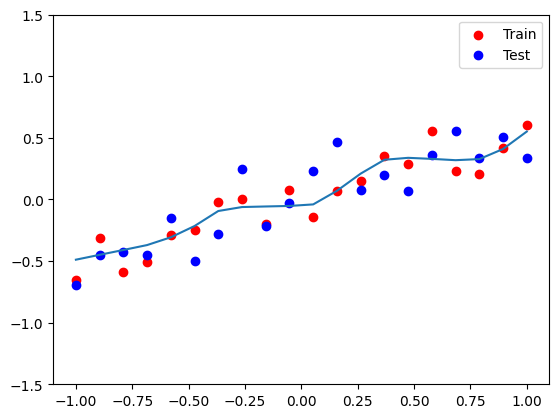

In [322]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [323]:
#regularization

In [324]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [325]:
X, y = make_moons(100, noise=0.25,random_state=2)

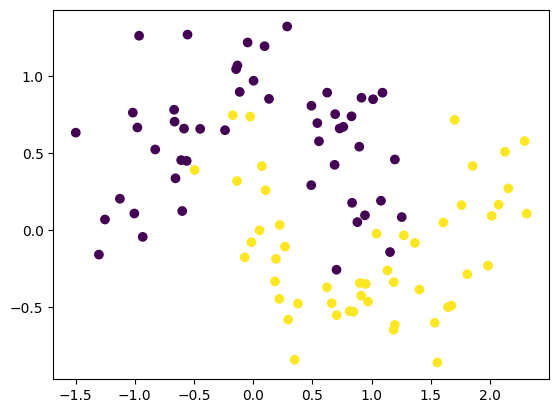

In [326]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [327]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               384       
                                                                 
 dense_53 (Dense)            (None, 128)               16512     
                                                                 
 dense_54 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [328]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 8s 877us/step


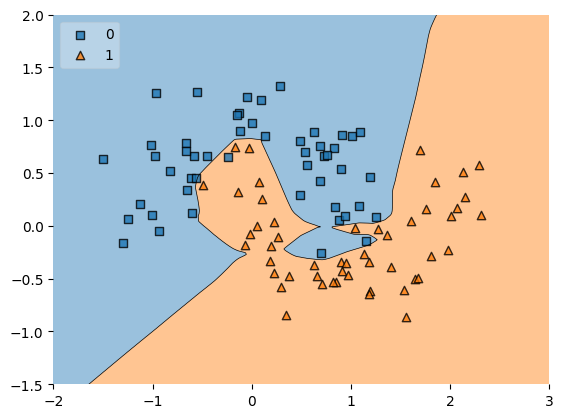

In [329]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

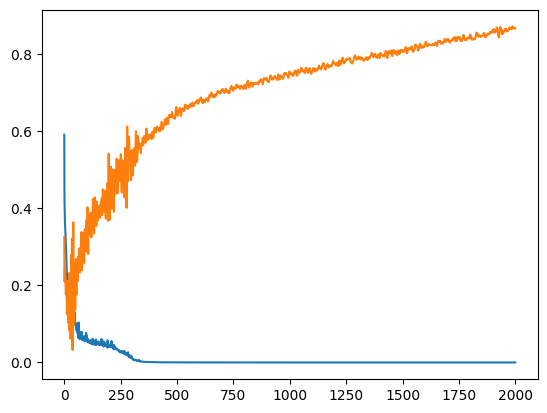

In [330]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [331]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 128)               384       
                                                                 
 dense_56 (Dense)            (None, 128)               16512     
                                                                 
 dense_57 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [332]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 10s 990us/step


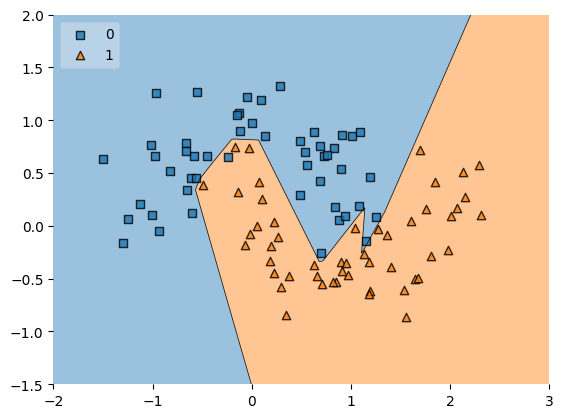

In [333]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

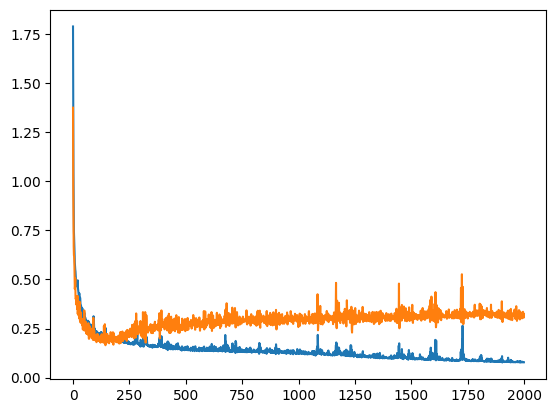

In [334]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [335]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<AxesSubplot: >

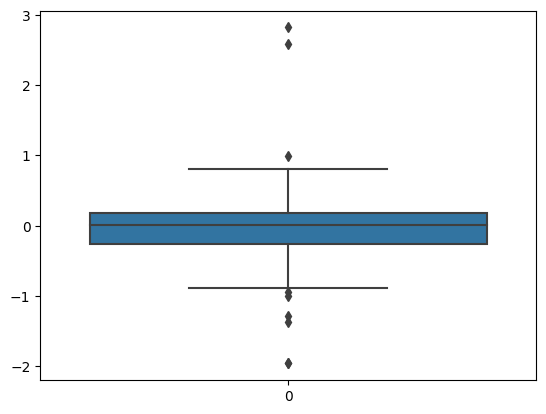

In [336]:
sns.boxplot(model1_weight_layer1)

<AxesSubplot: >

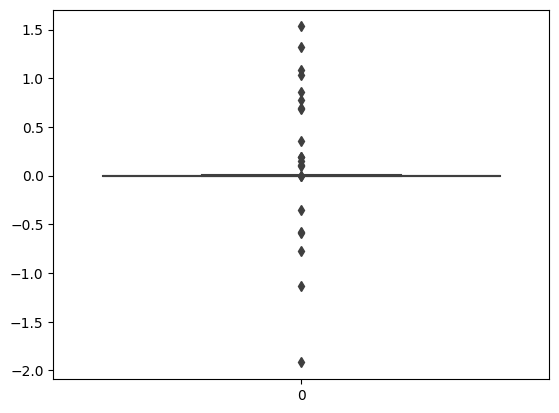

In [337]:
sns.boxplot(model2_weight_layer1)

In [338]:
model1_weight_layer1.min()

-1.9612594

In [339]:
model2_weight_layer1.min()

-1.9190724

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_7080\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_7080\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<AxesSubplot: ylabel='Density'>

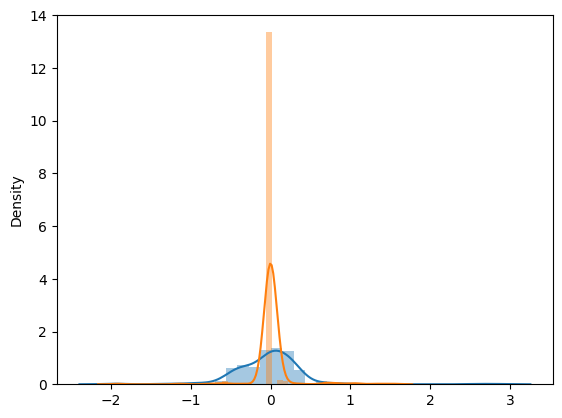

In [340]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [341]:
model1.get_weights()[0].reshape(256)

array([-4.51177359e-01, -1.89507201e-01,  2.24542711e-02,  2.73086637e-01,
        8.66996199e-02, -2.01978818e-01, -2.20716223e-01,  1.14064194e-01,
        2.56760120e-01,  1.97175741e-01,  4.23320271e-02,  2.00579807e-01,
       -4.86776114e-01, -4.43115264e-01, -4.20421399e-02, -2.96447188e-01,
       -3.68225038e-01, -3.06516886e-01,  4.00757253e-01, -3.79939854e-01,
       -4.89024162e-01, -4.32418793e-01,  3.84172685e-02,  4.76510078e-02,
       -1.77223742e-01,  1.04421504e-01,  5.36098983e-03,  1.43877432e-01,
        2.69294649e-01,  3.04525774e-02,  8.10341612e-02, -3.62022012e-01,
        3.08840990e-01, -4.49107885e-01,  2.41980612e-01,  1.25028178e-01,
        4.12438601e-01,  1.03099808e-01,  8.67062062e-02, -2.28872120e-01,
        7.76362196e-02, -8.43827724e-02,  2.02258509e-02, -1.31242454e-01,
       -3.43276680e-01, -2.86553204e-01,  2.89746881e-01,  1.92377523e-01,
       -3.79010677e-01, -2.98608959e-01,  1.84529871e-01,  2.65927225e-01,
       -1.34684816e-01, -

In [342]:
#Batch Normalization

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [344]:
df = pd.read_csv('concertriccir2.csv')
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


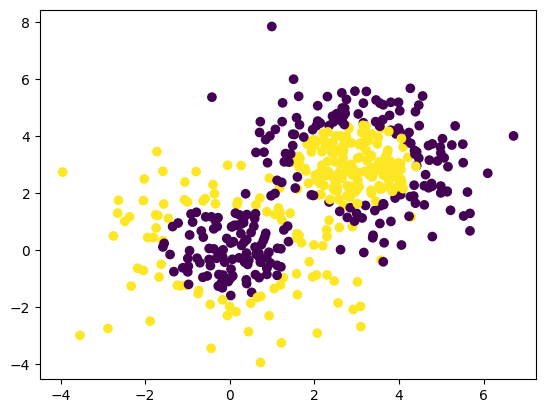

In [345]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [346]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [347]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [348]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 2)                 6         
                                                                 
 dense_59 (Dense)            (None, 2)                 6         
                                                                 
 dense_60 (Dense)            (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [349]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [350]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5075 - val_loss: 0.6933 - val_accuracy: 0.4300
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5175 - val_loss: 0.6936 - val_accuracy: 0.4300
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6937 - val_accuracy: 0.4300
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6940 - val_accuracy: 0.4300
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6941 - val_accuracy: 0.4300
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5175 - val_loss: 0.6943 - val_accuracy: 0.4300
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5175 - val_loss: 0.6944 - val_accuracy: 0.4300
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6980 - val_accuracy: 0.4300
Epoch 60/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6980 - val_accuracy: 0.4300
Epoch 61/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6982 - val_accuracy: 0.4300
Epoch 62/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6983 - val_accuracy: 0.4300
Epoch 63/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6982 - val_accuracy: 0.4300
Epoch 64/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6983 - val_accuracy: 0.4300
Epoch 65/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6983 - val_accuracy: 0.4300
Epoch 

13/13 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6985 - val_accuracy: 0.4300
Epoch 117/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6985 - val_accuracy: 0.4300
Epoch 118/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6984 - val_accuracy: 0.4300
Epoch 119/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6986 - val_accuracy: 0.4300
Epoch 120/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6985 - val_accuracy: 0.4300
Epoch 121/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6986 - val_accuracy: 0.4300
Epoch 122/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6987 - val_accuracy: 0.4300
Epoch 123/200

13/13 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6990 - val_accuracy: 0.4300
Epoch 174/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6988 - val_accuracy: 0.4300
Epoch 175/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6988 - val_accuracy: 0.4300
Epoch 176/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6988 - val_accuracy: 0.4300
Epoch 177/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6988 - val_accuracy: 0.4300
Epoch 178/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6989 - val_accuracy: 0.4300
Epoch 179/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5175 - val_loss: 0.6989 - val_accuracy: 0.4300
Epoch 180/200

In [351]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 3)                 9         
                                                                 
 batch_normalization (BatchN  (None, 3)                12        
 ormalization)                                                   
                                                                 
 dense_62 (Dense)            (None, 2)                 8         
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_63 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40
Trainable params: 30
Non-trainable p

In [352]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [353]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 3s 33ms/step - loss: 0.8104 - accuracy: 0.6250 - val_loss: 1.7676 - val_accuracy: 0.4500
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.8129 - accuracy: 0.6125 - val_loss: 1.5821 - val_accuracy: 0.4600
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7971 - accuracy: 0.6300 - val_loss: 1.4385 - val_accuracy: 0.4700
Epoch 4/200
13/13 [==============================] - 0s 10ms/step - loss: 0.7917 - accuracy: 0.6175 - val_loss: 1.3202 - val_accuracy: 0.5100
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7633 - accuracy: 0.6400 - val_loss: 1.2310 - val_accuracy: 0.5100
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7521 - accuracy: 0.6450 - val_loss: 1.1558 - val_accuracy: 0.5200
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7535 - accuracy: 0.6250 - val_loss: 1.0964 - val_accuracy: 0.5200
Epoch 8/200

Epoch 59/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.7025 - val_loss: 0.6932 - val_accuracy: 0.6000
Epoch 60/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.6850 - val_loss: 0.6943 - val_accuracy: 0.5900
Epoch 61/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6301 - accuracy: 0.7075 - val_loss: 0.6933 - val_accuracy: 0.5900
Epoch 62/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6338 - accuracy: 0.6900 - val_loss: 0.6931 - val_accuracy: 0.5900
Epoch 63/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6337 - accuracy: 0.6875 - val_loss: 0.6925 - val_accuracy: 0.5900
Epoch 64/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6326 - accuracy: 0.6700 - val_loss: 0.6913 - val_accuracy: 0.6000
Epoch 65/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.7025 - val_loss: 0.6909 - val_accuracy: 0.5900
Epoch 

13/13 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.6900 - val_loss: 0.6532 - val_accuracy: 0.6000
Epoch 117/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6133 - accuracy: 0.6875 - val_loss: 0.6511 - val_accuracy: 0.6000
Epoch 118/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.6925 - val_loss: 0.6508 - val_accuracy: 0.6000
Epoch 119/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6090 - accuracy: 0.7075 - val_loss: 0.6527 - val_accuracy: 0.6000
Epoch 120/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6087 - accuracy: 0.6900 - val_loss: 0.6525 - val_accuracy: 0.6000
Epoch 121/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5988 - accuracy: 0.7000 - val_loss: 0.6531 - val_accuracy: 0.6000
Epoch 122/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6043 - accuracy: 0.6900 - val_loss: 0.6543 - val_accuracy: 0.6000
Epoch 123/200

13/13 [==============================] - 0s 9ms/step - loss: 0.6064 - accuracy: 0.6925 - val_loss: 0.6559 - val_accuracy: 0.6100
Epoch 174/200
13/13 [==============================] - 0s 8ms/step - loss: 0.5868 - accuracy: 0.6975 - val_loss: 0.6554 - val_accuracy: 0.6000
Epoch 175/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6034 - accuracy: 0.6850 - val_loss: 0.6546 - val_accuracy: 0.6100
Epoch 176/200
13/13 [==============================] - 0s 6ms/step - loss: 0.5971 - accuracy: 0.6850 - val_loss: 0.6529 - val_accuracy: 0.6200
Epoch 177/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6049 - accuracy: 0.6875 - val_loss: 0.6516 - val_accuracy: 0.6200
Epoch 178/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6032 - accuracy: 0.6825 - val_loss: 0.6498 - val_accuracy: 0.6100
Epoch 179/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6055 - accuracy: 0.6850 - val_loss: 0.6507 - val_accuracy: 0.6200
Epoch 180/200

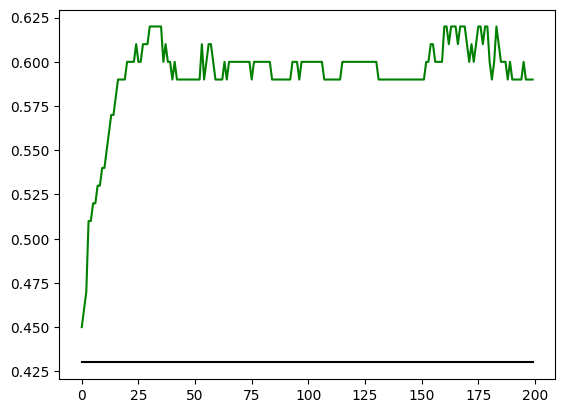

In [354]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

In [355]:
#Keras Tuner

In [356]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras

In [357]:
# Reading the file
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [358]:
df.shape # Shape of ‘df’

(768, 9)

In [359]:
df.columns # Prints columns of ‘df’

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [360]:
df.describe() # Displays properties of each column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [361]:
dataset = df.values

In [362]:
X = dataset[:,0:8]
y = dataset[:,8].astype('int')

In [363]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [364]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [365]:
#Tuning of Hyperparameters :- Batch Size and Epochs

In [366]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [367]:
#defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 8, kernel_initializer ='normal',activation = 'relu'))
    model.add(Dense(4,input_dim = 8, kernel_initializer ='normal',activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr=0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
    return model

In [368]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_7080\659144266.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.753 total time=   2.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.714 total time=   1.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.714 total time=   1.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.830 total time=   1.2s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.758 total time=   1.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [369]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7748408555984497, using {'batch_size': 20, 'epochs': 10}
0.7540107011795044,0.04232810426639523 with: {'batch_size': 10, 'epochs': 10}
0.7578898310661316,0.040652548075340314 with: {'batch_size': 10, 'epochs': 50}
0.7708768486976624,0.029455230011285766 with: {'batch_size': 10, 'epochs': 100}
0.7748408555984497,0.038221072962351804 with: {'batch_size': 20, 'epochs': 10}
0.7591800332069397,0.03704256541001288 with: {'batch_size': 20, 'epochs': 50}
0.7657159924507141,0.042049509410341905 with: {'batch_size': 20, 'epochs': 100}
0.7722094893455506,0.03759147382852386 with: {'batch_size': 40, 'epochs': 10}
0.7669722437858582,0.029425857424139043 with: {'batch_size': 40, 'epochs': 50}
0.7383923411369324,0.042387092383625244 with: {'batch_size': 40, 'epochs': 100}


In [370]:
#Tuning of Hyperparameters:- Learning rate and Drop out rate

In [371]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_7080\3473897814.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.773 total time=   0.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.734 total time=   0.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.630 total time=   0.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.784 total time=   0.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.765 total time=   0.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.760 total time=   0.7s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01......

In [372]:
#Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [373]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters

param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_7080\736934633.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.649 total time=   0.8s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.416 total time=   0.8s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.630 total time=   0.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.745 total time=   0.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.647 total time=   0.8s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.649 total time=   0.8s
[CV 2/5; 2/12] START activation_

[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.830 total time=   0.8s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.758 total time=   0.8s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.760 total time=   0.8s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.701 total time=   0.8s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.753 total time=   0.9s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.817 total time=   0.8s
[CV 5/5; 11/12] START activation_fu

In [374]:
#Tuning of Hyperparameter :-Number of Neurons in activation layer

In [375]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 8,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_7080\3357022761.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.773 total time=   0.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.669 total time=   1.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.708 total time=   0.9s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.784 total time=   0.8s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.739 total time=   0.8s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.766 total time=   0.8s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 2/9] END .........n

In [376]:
#The optimum values of Hyperparameters are as follows :-
#Batch size = 40
#Epochs = 10
#Dropout rate = 0.1
#Learning rate = 0.001
#Activation function = tanh
#Kernel Initializer = uniform
#No. of neurons in layer 1 = 16
#No. of neurons in layer 2 = 4

In [377]:
#Training model with optimum values of Hyperparameters

In [378]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 8,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics

print(accuracy_score(y,y_predict))
print(classification_report(y,y_predict))

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_7080\3029200500.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


24/24 [==============================] - 0s 939us/step
0.7734375
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       500
           1       0.71      0.59      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_7080\692096166.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.649 total time=   1.4s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.584 total time=   1.5s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.630 total time=   1.2s
[CV 4/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuro

[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.649 total time=   1.4s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.584 total time=   1.4s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.630 total time=   1.5s
[CV 4/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuro

[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.727 total time=   1.3s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.682 total time=   1.4s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.773 total time=   1.2s
[CV 4/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuro

[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.727 total time=   1.4s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.688 total time=   1.3s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.760 total time=   1.3s
[CV 4/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16,

[CV 1/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.721 total time=   1.3s
[CV 2/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.675 total time=   1.2s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.773 total time=   1.2s
[CV 4/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[

[CV 1/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.701 total time=   1.5s
[CV 2/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.714 total time=   1.3s
[CV 3/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.708 total time=   1.2s
[CV 4/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuro

[CV 1/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.649 total time=   1.2s
[CV 2/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.584 total time=   1.4s
[CV 3/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.630 total time=   1.2s
[CV 4/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuro

[CV 1/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.649 total time=   1.2s
[CV 2/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.584 total time=   1.2s
[CV 3/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.630 total time=   1.3s
[CV 4/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16,

[CV 1/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.740 total time=   1.2s
[CV 2/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.721 total time=   1.2s
[CV 3/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.773 total time=   1.2s
[CV 4/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[

[CV 1/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.714 total time=   1.2s
[CV 2/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.708 total time=   1.2s
[CV 3/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.708 total time=   1.2s
[CV 4/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5

[CV 1/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.727 total time=   1.2s
[CV 2/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.682 total time=   1.2s
[CV 3/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.747 total time=   1.2s
[CV 4/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5

[CV 1/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.649 total time=   1.3s
[CV 2/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.584 total time=   1.2s
[CV 3/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.630 total time=   1.2s
[CV 4/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5

[CV 1/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.649 total time=   1.2s
[CV 2/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.584 total time=   1.2s
[CV 3/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.630 total time=   1.2s
[CV 4/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[

[CV 1/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.649 total time=   1.3s
[CV 2/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.584 total time=   1.2s
[CV 3/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.630 total time=   1.2s
[CV 4/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 66/8

[CV 1/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.649 total time=   2.7s
[CV 2/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.584 total time=   2.9s
[CV 3/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.630 total time=   2.1s
[CV 4/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5

[CV 1/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.649 total time=   1.3s
[CV 2/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.584 total time=   1.3s
[CV 3/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.630 total time=   1.3s
[CV 4/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 76/8748] E

[CV 1/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.649 total time=   1.2s
[CV 2/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.584 total time=   1.2s
[CV 3/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.630 total time=   1.2s
[CV 4/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 81/8

[CV 1/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.734 total time=   5.2s
[CV 2/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.727 total time=   4.7s
[CV 3/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.766 total time=   4.3s
[CV 4/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8,

[CV 1/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.714 total time=   5.7s
[CV 2/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.701 total time=   5.9s
[CV 3/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.766 total time=   5.4s
[CV 4/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuro

[CV 1/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.721 total time=   3.9s
[CV 2/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.636 total time=   3.9s
[CV 3/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.747 total time=   3.9s
[CV 4/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuro

[CV 1/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.721 total time=   4.0s
[CV 2/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.727 total time=   4.0s
[CV 3/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.773 total time=   3.9s
[CV 4/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuro

[CV 1/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.747 total time=   4.0s
[CV 2/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.656 total time=   4.0s
[CV 3/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.734 total time=   4.0s
[CV 4/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16,

[CV 1/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.753 total time=   4.0s
[CV 2/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.727 total time=   3.9s
[CV 3/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.760 total time=   4.1s
[CV 4/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4,

[CV 1/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.740 total time=   4.0s
[CV 2/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.721 total time=   4.0s
[CV 3/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.766 total time=   3.9s
[CV 4/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuro

[CV 1/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.714 total time=   4.4s
[CV 2/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.662 total time=   4.0s
[CV 3/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.721 total time=   3.9s
[CV 4/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuro

[CV 1/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.721 total time=   3.9s
[CV 2/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.656 total time=   3.9s
[CV 3/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.773 total time=   4.5s
[CV 4/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16,

[CV 1/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.688 total time=   3.9s
[CV 2/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.675 total time=   3.9s
[CV 3/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.649 total time=   3.9s
[CV 4/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[

[CV 1/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.649 total time=   4.4s
[CV 2/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.584 total time=   6.5s
[CV 3/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.630 total time=   6.1s
[CV 4/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[

[CV 1/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.649 total time=   4.0s
[CV 2/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.584 total time=   4.0s
[CV 3/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.630 total time=   4.2s
[CV 4/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[

[CV 1/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.649 total time=   3.9s
[CV 2/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.584 total time=   4.0s
[CV 3/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.630 total time=   4.0s
[CV 4/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5

[CV 1/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.649 total time=   4.0s
[CV 2/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.584 total time=   4.1s
[CV 3/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.630 total time=   4.2s
[CV 4/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[

[CV 1/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.649 total time=   4.0s
[CV 2/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.584 total time=   4.0s
[CV 3/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.630 total time=   4.4s
[CV 4/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 156/

[CV 1/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.649 total time=   4.0s
[CV 2/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.584 total time=   4.0s
[CV 3/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.630 total time=   4.0s
[CV 4/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5

[CV 1/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.740 total time=   7.6s
[CV 2/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.701 total time=   7.6s
[CV 3/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.760 total time=   7.4s
[CV 4/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001

[CV 5/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.771 total time=   7.5s
[CV 1/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.727 total time=   7.3s
[CV 2/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.701 total time=   7.4s
[CV 3/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=

[CV 5/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.771 total time=   9.1s
[CV 1/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.708 total time=   8.1s
[CV 2/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.688 total time=   8.0s
[CV 3/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neur

[CV 5/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.745 total time=   7.8s
[CV 1/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.727 total time=   7.8s
[CV 2/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.649 total time=   8.2s
[CV 3/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=

[CV 5/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.745 total time=   7.9s
[CV 1/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.675 total time=   7.9s
[CV 2/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.682 total time=   7.8s
[CV 3/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8,

[CV 5/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.752 total time=   7.8s
[CV 1/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.734 total time=   7.8s
[CV 2/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.695 total time=   7.9s
[CV 3/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neur

[CV 5/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.765 total time=   7.4s
[CV 1/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.734 total time=   7.5s
[CV 2/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.688 total time=   7.6s
[CV 3/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, 

[CV 5/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.771 total time=   7.7s
[CV 1/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.740 total time=   7.4s
[CV 2/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.688 total time=   7.5s
[CV 3/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4,

[CV 5/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.817 total time=   8.5s
[CV 1/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.708 total time=  12.6s
[CV 2/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.675 total time=   8.4s
[CV 3/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuro

In [ ]:
#https://www.kaggle.com/code/abrahamanderson/artificial-neural-networks-for-regression

In [ ]:
#https://www.kaggle.com/code/niteshk97/keras-tuner-hyperparameter-tuning-a-neural-netwo

In [ ]:
#https://www.youtube.com/watch?v=oYnyNLj8RMA&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=39

In [ ]:
#https://medium.datadriveninvestor.com/hyperparameter-tuning-with-deep-learning-grid-search-8630aa45b2da